In [179]:
import os
from scipy import sparse, vstack
import pandas as pd
import numpy as np
import neural_network as nn
import LSTM
import datapreprocessing as dp
import torch
import torch.nn as nn
import torch.utils.data as data
import matplotlib.pyplot as plt

## Loading the data

In [3]:
df_user_item_rating = pd.read_csv("cleaned_user_item_rating.csv")
# df['a'] = df['a'].round(0).astype(int)


In [4]:
df_user_item_rating.overall = df_user_item_rating.overall.round(0).astype(int)

In [5]:
# number of unique users
n_users = df_user_item_rating.reviewerID.unique().shape[0]
print('{} unique users'.format(n_users))

87271 unique users


In [6]:
# number of unique items
n_items = df_user_item_rating.asin.unique().shape[0]
print('{} unique items'.format(n_items))

13209 unique items


Given the underwhelming performance of our matrix factorization model, we try a simple feedforward recommendation system instead. 


Input of this neural network is a pair of user and item represented by their IDs. Both user and item IDs first pass through an embedding layer. The output of the embedding layer, which are two embedding vectors, are then concatenated into one and passed into a linear network. 


Output of the linear network is one dimensional - representing the rating for the user-item pair. 

The model is fit the same way as the matrix factorization model and uses the standard PyTorch approach of forward passing, computing the loss, backpropagating and updating weights.

In [ ]:
def train_test_split(ratings):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(0, ratings.shape[0]):
        test_ratings = np.random.choice(ratings[user, :].nonzero()[0],
                                        size=10,
                                        replace=False)
        train[user, test_ratings] = 0.
        test[user, test_ratings] = ratings[user, test_ratings]

    # Test and training are truly disjoint
    assert(np.all((train*test) == 0))
    return train, test


In [ ]:
# normalize into [0,1]
def normalize(ratings):
    ratings = ratings.copy()
    max_ratings = ratings.max()
    ratings = ratings*1.0/max_ratings
    return ratings

In [ ]:
#df_user_item_rating.overall = normalize(df_user_item_rating.overall)

In [ ]:
#df_user_item_rating.head()

In [ ]:
H1 = 128
D_out = 1
model = nn.DenseNet(n_users, n_items, n_factors=40,H1=H1,D_out=D_out)

In [ ]:
print(model)

In [7]:
ratings = df_user_item_rating.pivot(index='reviewerID', columns='asin', values='overall').fillna(0)

In [ ]:
def train_neural_network(model, ratings, lr=1e-6):
    loss_fn = torch.nn.MSELoss() 
    optimizer = torch.optim.SGD(model.parameters(),
                            lr=lr)

    # Sort our data
    ratings = np.array(ratings)
    users, items = ratings.nonzero()
    t = 0.0
    total_loss = torch.Tensor([0])
    p = np.random.permutation(len(users))
    users, items = users[p], items[p]
    loss_hist = []
    for user, item in zip(*(users, items)):
        t = t + 1
        # get user, item and rating data
        rating = torch.FloatTensor([ratings[user, item]])
        user = torch.LongTen
        sor([int(user)])
        item = torch.LongTensor([int(item)])
    
        # predict and calculate loss
        prediction = model.forward(user, item).flatten()
        loss = torch.sqrt(loss_fn(prediction, rating))
    
        # backpropagate
        loss.backward()

        # update weights
        optimizer.step()
    
        # Print
        if t % 100 == 0:
            #running_loss = float(running_loss) + float(loss.item()[0])
            loss_hist.append(loss.item())
            #print(t, loss.item())
            print(np.sum(loss_hist)/len(loss_hist))

In [ ]:
#train_neural_network(model, ratings)

In [ ]:
import torch.utils.data as data

class Interactions(data.Dataset):
    """
    Hold data in the form of an interactions matrix.
    Typical use-case is like a ratings matrix:
    - Users are the rows
    - Items are the columns
    - Elements of the matrix are the ratings given by a user for an item.
    """

    def __init__(self, mat):
        self.mat = mat.astype(np.float32).tocoo()
        self.n_users = self.mat.shape[0]
        self.n_items = self.mat.shape[1]

    def __getitem__(self, index):
        row = self.mat.row[index]
        col = self.mat.col[index]
        val = self.mat.data[index]
        return (row, col), val

    def __len__(self):
        return self.mat.nnz

In [33]:
ratings = pd.DataFrame(ratings)

AttributeError: 'DataFrame' object has no attribute 'data'

In [35]:
ratings = ratings.astype(np.float32).tocoo()

AttributeError: 'numpy.ndarray' object has no attribute 'tocoo'

In [21]:
ratings = np.array(ratings)

In [22]:
for user in range(len(ratings)):
    user_name = np.ones(ratings.shape[1])*user
    user_name = user_name.astype(int)
    j = ratings[user,:]
    items = pd.DataFrame(ratings).columns.values
    A = sparse.csr_matrix(((user_name),(items,j)))
    print(A)

  (0, 0)	0
  (1, 0)	0
  (2, 0)	0
  (3, 0)	0
  (4, 0)	0
  (5, 0)	0
  (6, 0)	0
  (7, 0)	0
  (8, 0)	0
  (9, 0)	0
  (10, 0)	0
  (11, 0)	0
  (12, 0)	0
  (13, 0)	0
  (14, 0)	0
  (15, 0)	0
  (16, 0)	0
  (17, 0)	0
  (18, 0)	0
  (19, 0)	0
  (20, 0)	0
  (21, 0)	0
  (22, 0)	0
  (23, 0)	0
  (24, 0)	0
  :	:
  (13184, 0)	0
  (13185, 0)	0
  (13186, 0)	0
  (13187, 0)	0
  (13188, 0)	0
  (13189, 0)	0
  (13190, 0)	0
  (13191, 0)	0
  (13192, 0)	0
  (13193, 0)	0
  (13194, 0)	0
  (13195, 0)	0
  (13196, 0)	0
  (13197, 0)	0
  (13198, 0)	0
  (13199, 0)	0
  (13200, 0)	0
  (13201, 0)	0
  (13202, 0)	0
  (13203, 0)	0
  (13204, 0)	0
  (13205, 0)	0
  (13206, 0)	0
  (13207, 0)	0
  (13208, 0)	0
  (0, 0)	1
  (1, 0)	1
  (2, 0)	1
  (3, 0)	1
  (4, 0)	1
  (5, 0)	1
  (6, 0)	1
  (7, 0)	1
  (8, 0)	1
  (9, 0)	1
  (10, 0)	1
  (11, 0)	1
  (12, 0)	1
  (13, 0)	1
  (14, 0)	1
  (15, 0)	1
  (16, 0)	1
  (17, 0)	1
  (18, 0)	1
  (19, 0)	1
  (20, 0)	1
  (21, 0)	1
  (22, 0)	1
  (23, 0)	1
  (24, 0)	1
  :	:
  (13184, 0)	1
  (13185, 0)	1
  (

  (0, 0)	61
  (1, 0)	61
  (2, 0)	61
  (3, 0)	61
  (4, 0)	61
  (5, 0)	61
  (6, 0)	61
  (7, 0)	61
  (8, 0)	61
  (9, 0)	61
  (10, 0)	61
  (11, 0)	61
  (12, 0)	61
  (13, 0)	61
  (14, 0)	61
  (15, 0)	61
  (16, 0)	61
  (17, 0)	61
  (18, 0)	61
  (19, 0)	61
  (20, 0)	61
  (21, 0)	61
  (22, 0)	61
  (23, 0)	61
  (24, 0)	61
  :	:
  (13184, 0)	61
  (13185, 0)	61
  (13186, 0)	61
  (13187, 0)	61
  (13188, 0)	61
  (13189, 0)	61
  (13190, 0)	61
  (13191, 0)	61
  (13192, 0)	61
  (13193, 0)	61
  (13194, 0)	61
  (13195, 0)	61
  (13196, 0)	61
  (13197, 0)	61
  (13198, 0)	61
  (13199, 0)	61
  (13200, 0)	61
  (13201, 0)	61
  (13202, 0)	61
  (13203, 0)	61
  (13204, 0)	61
  (13205, 0)	61
  (13206, 0)	61
  (13207, 0)	61
  (13208, 0)	61
  (0, 0)	62
  (1, 0)	62
  (2, 0)	62
  (3, 0)	62
  (4, 0)	62
  (5, 0)	62
  (6, 0)	62
  (7, 0)	62
  (8, 0)	62
  (9, 0)	62
  (10, 0)	62
  (11, 0)	62
  (12, 0)	62
  (13, 0)	62
  (14, 0)	62
  (15, 0)	62
  (16, 0)	62
  (17, 0)	62
  (18, 0)	62
  (19, 0)	62
  (20, 0)	62
  (21, 0)	62
  (

  (0, 0)	153
  (1, 0)	153
  (2, 0)	153
  (3, 0)	153
  (4, 0)	153
  (5, 0)	153
  (6, 0)	153
  (7, 0)	153
  (8, 0)	153
  (9, 0)	153
  (10, 0)	153
  (11, 0)	153
  (12, 0)	153
  (13, 0)	153
  (14, 0)	153
  (15, 0)	153
  (16, 0)	153
  (17, 0)	153
  (18, 0)	153
  (19, 0)	153
  (20, 0)	153
  (21, 0)	153
  (22, 0)	153
  (23, 0)	153
  (24, 0)	153
  :	:
  (13184, 0)	153
  (13185, 0)	153
  (13186, 0)	153
  (13187, 0)	153
  (13188, 0)	153
  (13189, 0)	153
  (13190, 0)	153
  (13191, 0)	153
  (13192, 0)	153
  (13193, 0)	153
  (13194, 0)	153
  (13195, 0)	153
  (13196, 0)	153
  (13197, 0)	153
  (13198, 0)	153
  (13199, 0)	153
  (13200, 0)	153
  (13201, 0)	153
  (13202, 0)	153
  (13203, 0)	153
  (13204, 0)	153
  (13205, 0)	153
  (13206, 0)	153
  (13207, 0)	153
  (13208, 0)	153
  (0, 0)	154
  (1, 0)	154
  (2, 0)	154
  (3, 0)	154
  (4, 0)	154
  (5, 0)	154
  (6, 0)	154
  (7, 0)	154
  (8, 0)	154
  (9, 0)	154
  (10, 0)	154
  (11, 0)	154
  (12, 0)	154
  (13, 0)	154
  (14, 0)	154
  (15, 0)	154
  (16, 0)	154
 

  (0, 0)	230
  (1, 0)	230
  (2, 0)	230
  (3, 0)	230
  (4, 0)	230
  (5, 0)	230
  (6, 0)	230
  (7, 0)	230
  (8, 0)	230
  (9, 0)	230
  (10, 0)	230
  (11, 0)	230
  (12, 0)	230
  (13, 0)	230
  (14, 0)	230
  (15, 0)	230
  (16, 0)	230
  (17, 0)	230
  (18, 0)	230
  (19, 0)	230
  (20, 0)	230
  (21, 0)	230
  (22, 0)	230
  (23, 0)	230
  (24, 0)	230
  :	:
  (13184, 0)	230
  (13185, 0)	230
  (13186, 0)	230
  (13187, 0)	230
  (13188, 0)	230
  (13189, 0)	230
  (13190, 0)	230
  (13191, 0)	230
  (13192, 0)	230
  (13193, 0)	230
  (13194, 0)	230
  (13195, 0)	230
  (13196, 0)	230
  (13197, 0)	230
  (13198, 0)	230
  (13199, 0)	230
  (13200, 0)	230
  (13201, 0)	230
  (13202, 0)	230
  (13203, 0)	230
  (13204, 0)	230
  (13205, 0)	230
  (13206, 0)	230
  (13207, 0)	230
  (13208, 0)	230
  (0, 0)	231
  (1, 0)	231
  (2, 0)	231
  (3, 0)	231
  (4, 0)	231
  (5, 0)	231
  (6, 0)	231
  (7, 0)	231
  (8, 0)	231
  (9, 0)	231
  (10, 0)	231
  (11, 0)	231
  (12, 0)	231
  (13, 0)	231
  (14, 0)	231
  (15, 0)	231
  (16, 0)	231
 

  (0, 0)	348
  (1, 0)	348
  (2, 0)	348
  (3, 0)	348
  (4, 0)	348
  (5, 0)	348
  (6, 0)	348
  (7, 0)	348
  (8, 0)	348
  (9, 0)	348
  (10, 0)	348
  (11, 0)	348
  (12, 0)	348
  (13, 0)	348
  (14, 0)	348
  (15, 0)	348
  (16, 0)	348
  (17, 0)	348
  (18, 0)	348
  (19, 0)	348
  (20, 0)	348
  (21, 0)	348
  (22, 0)	348
  (23, 0)	348
  (24, 0)	348
  :	:
  (13184, 0)	348
  (13185, 0)	348
  (13186, 0)	348
  (13187, 0)	348
  (13188, 0)	348
  (13189, 0)	348
  (13190, 0)	348
  (13191, 0)	348
  (13192, 0)	348
  (13193, 0)	348
  (13194, 0)	348
  (13195, 0)	348
  (13196, 0)	348
  (13197, 0)	348
  (13198, 0)	348
  (13199, 0)	348
  (13200, 0)	348
  (13201, 0)	348
  (13202, 0)	348
  (13203, 0)	348
  (13204, 0)	348
  (13205, 0)	348
  (13206, 0)	348
  (13207, 0)	348
  (13208, 0)	348
  (0, 0)	349
  (1, 0)	349
  (2, 0)	349
  (3, 0)	349
  (4, 0)	349
  (5, 0)	349
  (6, 0)	349
  (7, 0)	349
  (8, 0)	349
  (9, 0)	349
  (10, 0)	349
  (11, 0)	349
  (12, 0)	349
  (13, 0)	349
  (14, 0)	349
  (15, 0)	349
  (16, 0)	349
 

  (0, 0)	440
  (1, 0)	440
  (2, 0)	440
  (3, 0)	440
  (4, 0)	440
  (5, 0)	440
  (6, 0)	440
  (7, 0)	440
  (8, 0)	440
  (9, 0)	440
  (10, 0)	440
  (11, 0)	440
  (12, 0)	440
  (13, 0)	440
  (14, 0)	440
  (15, 0)	440
  (16, 0)	440
  (17, 0)	440
  (18, 0)	440
  (19, 0)	440
  (20, 0)	440
  (21, 0)	440
  (22, 0)	440
  (23, 0)	440
  (24, 0)	440
  :	:
  (13184, 0)	440
  (13185, 0)	440
  (13186, 0)	440
  (13187, 0)	440
  (13188, 0)	440
  (13189, 0)	440
  (13190, 0)	440
  (13191, 0)	440
  (13192, 0)	440
  (13193, 0)	440
  (13194, 0)	440
  (13195, 0)	440
  (13196, 0)	440
  (13197, 0)	440
  (13198, 0)	440
  (13199, 0)	440
  (13200, 0)	440
  (13201, 0)	440
  (13202, 0)	440
  (13203, 0)	440
  (13204, 0)	440
  (13205, 0)	440
  (13206, 0)	440
  (13207, 0)	440
  (13208, 0)	440
  (0, 0)	441
  (1, 0)	441
  (2, 0)	441
  (3, 0)	441
  (4, 0)	441
  (5, 0)	441
  (6, 0)	441
  (7, 0)	441
  (8, 0)	441
  (9, 0)	441
  (10, 0)	441
  (11, 0)	441
  (12, 0)	441
  (13, 0)	441
  (14, 0)	441
  (15, 0)	441
  (16, 0)	441
 

  (0, 0)	514
  (1, 0)	514
  (2, 0)	514
  (3, 0)	514
  (4, 0)	514
  (5, 0)	514
  (6, 0)	514
  (7, 0)	514
  (8, 0)	514
  (9, 0)	514
  (10, 0)	514
  (11, 0)	514
  (12, 0)	514
  (13, 0)	514
  (14, 0)	514
  (15, 0)	514
  (16, 0)	514
  (17, 0)	514
  (18, 0)	514
  (19, 0)	514
  (20, 0)	514
  (21, 0)	514
  (22, 0)	514
  (23, 0)	514
  (24, 0)	514
  :	:
  (13184, 0)	514
  (13185, 0)	514
  (13186, 0)	514
  (13187, 0)	514
  (13188, 0)	514
  (13189, 0)	514
  (13190, 0)	514
  (13191, 0)	514
  (13192, 0)	514
  (13193, 0)	514
  (13194, 0)	514
  (13195, 0)	514
  (13196, 0)	514
  (13197, 0)	514
  (13198, 0)	514
  (13199, 0)	514
  (13200, 0)	514
  (13201, 0)	514
  (13202, 0)	514
  (13203, 0)	514
  (13204, 0)	514
  (13205, 0)	514
  (13206, 0)	514
  (13207, 0)	514
  (13208, 0)	514
  (0, 0)	515
  (1, 0)	515
  (2, 0)	515
  (3, 0)	515
  (4, 0)	515
  (5, 0)	515
  (6, 0)	515
  (7, 0)	515
  (8, 0)	515
  (9, 0)	515
  (10, 0)	515
  (11, 0)	515
  (12, 0)	515
  (13, 0)	515
  (14, 0)	515
  (15, 0)	515
  (16, 0)	515
 

  (0, 0)	628
  (1, 0)	628
  (2, 0)	628
  (3, 0)	628
  (4, 0)	628
  (5, 0)	628
  (6, 0)	628
  (7, 0)	628
  (8, 0)	628
  (9, 0)	628
  (10, 0)	628
  (11, 0)	628
  (12, 0)	628
  (13, 0)	628
  (14, 0)	628
  (15, 0)	628
  (16, 0)	628
  (17, 0)	628
  (18, 0)	628
  (19, 0)	628
  (20, 0)	628
  (21, 0)	628
  (22, 0)	628
  (23, 0)	628
  (24, 0)	628
  :	:
  (13184, 0)	628
  (13185, 0)	628
  (13186, 0)	628
  (13187, 0)	628
  (13188, 0)	628
  (13189, 0)	628
  (13190, 0)	628
  (13191, 0)	628
  (13192, 0)	628
  (13193, 0)	628
  (13194, 0)	628
  (13195, 0)	628
  (13196, 0)	628
  (13197, 0)	628
  (13198, 0)	628
  (13199, 0)	628
  (13200, 0)	628
  (13201, 0)	628
  (13202, 0)	628
  (13203, 0)	628
  (13204, 0)	628
  (13205, 0)	628
  (13206, 0)	628
  (13207, 0)	628
  (13208, 0)	628
  (0, 0)	629
  (1, 0)	629
  (2, 0)	629
  (3, 0)	629
  (4, 0)	629
  (5, 0)	629
  (6, 0)	629
  (7, 0)	629
  (8, 0)	629
  (9, 0)	629
  (10, 0)	629
  (11, 0)	629
  (12, 0)	629
  (13, 0)	629
  (14, 0)	629
  (15, 0)	629
  (16, 0)	629
 

  (0, 0)	739
  (1, 0)	739
  (2, 0)	739
  (3, 0)	739
  (4, 0)	739
  (5, 0)	739
  (6, 0)	739
  (7, 0)	739
  (8, 0)	739
  (9, 0)	739
  (10, 0)	739
  (11, 0)	739
  (12, 0)	739
  (13, 0)	739
  (14, 0)	739
  (15, 0)	739
  (16, 0)	739
  (17, 0)	739
  (18, 0)	739
  (19, 0)	739
  (20, 0)	739
  (21, 0)	739
  (22, 0)	739
  (23, 0)	739
  (24, 0)	739
  :	:
  (13184, 0)	739
  (13185, 0)	739
  (13186, 0)	739
  (13187, 0)	739
  (13188, 0)	739
  (13189, 0)	739
  (13190, 0)	739
  (13191, 0)	739
  (13192, 0)	739
  (13193, 0)	739
  (13194, 0)	739
  (13195, 0)	739
  (13196, 0)	739
  (13197, 0)	739
  (13198, 0)	739
  (13199, 0)	739
  (13200, 0)	739
  (13201, 0)	739
  (13202, 0)	739
  (13203, 0)	739
  (13204, 0)	739
  (13205, 0)	739
  (13206, 0)	739
  (13207, 0)	739
  (13208, 0)	739
  (0, 0)	740
  (1, 0)	740
  (2, 0)	740
  (3, 0)	740
  (4, 0)	740
  (5, 0)	740
  (6, 0)	740
  (7, 0)	740
  (8, 0)	740
  (9, 0)	740
  (10, 0)	740
  (11, 0)	740
  (12, 0)	740
  (13, 0)	740
  (14, 0)	740
  (15, 0)	740
  (16, 0)	740
 

  (0, 0)	844
  (1, 0)	844
  (2, 0)	844
  (3, 0)	844
  (4, 0)	844
  (5, 0)	844
  (6, 0)	844
  (7, 0)	844
  (8, 0)	844
  (9, 0)	844
  (10, 0)	844
  (11, 0)	844
  (12, 0)	844
  (13, 0)	844
  (14, 0)	844
  (15, 0)	844
  (16, 0)	844
  (17, 0)	844
  (18, 0)	844
  (19, 0)	844
  (20, 0)	844
  (21, 0)	844
  (22, 0)	844
  (23, 0)	844
  (24, 0)	844
  :	:
  (13184, 0)	844
  (13185, 0)	844
  (13186, 0)	844
  (13187, 0)	844
  (13188, 0)	844
  (13189, 0)	844
  (13190, 0)	844
  (13191, 0)	844
  (13192, 0)	844
  (13193, 0)	844
  (13194, 0)	844
  (13195, 0)	844
  (13196, 0)	844
  (13197, 0)	844
  (13198, 0)	844
  (13199, 0)	844
  (13200, 0)	844
  (13201, 0)	844
  (13202, 0)	844
  (13203, 0)	844
  (13204, 0)	844
  (13205, 0)	844
  (13206, 0)	844
  (13207, 0)	844
  (13208, 0)	844
  (0, 0)	845
  (1, 0)	845
  (2, 0)	845
  (3, 0)	845
  (4, 0)	845
  (5, 0)	845
  (6, 0)	845
  (7, 0)	845
  (8, 0)	845
  (9, 0)	845
  (10, 0)	845
  (11, 0)	845
  (12, 0)	845
  (13, 0)	845
  (14, 0)	845
  (15, 0)	845
  (16, 0)	845
 

  (0, 0)	936
  (1, 0)	936
  (2, 0)	936
  (3, 0)	936
  (4, 0)	936
  (5, 0)	936
  (6, 0)	936
  (7, 0)	936
  (8, 0)	936
  (9, 0)	936
  (10, 0)	936
  (11, 0)	936
  (12, 0)	936
  (13, 0)	936
  (14, 0)	936
  (15, 0)	936
  (16, 0)	936
  (17, 0)	936
  (18, 0)	936
  (19, 0)	936
  (20, 0)	936
  (21, 0)	936
  (22, 0)	936
  (23, 0)	936
  (24, 0)	936
  :	:
  (13184, 0)	936
  (13185, 0)	936
  (13186, 0)	936
  (13187, 0)	936
  (13188, 0)	936
  (13189, 0)	936
  (13190, 0)	936
  (13191, 0)	936
  (13192, 0)	936
  (13193, 0)	936
  (13194, 0)	936
  (13195, 0)	936
  (13196, 0)	936
  (13197, 0)	936
  (13198, 0)	936
  (13199, 0)	936
  (13200, 0)	936
  (13201, 0)	936
  (13202, 0)	936
  (13203, 0)	936
  (13204, 0)	936
  (13205, 0)	936
  (13206, 0)	936
  (13207, 0)	936
  (13208, 0)	936
  (0, 0)	937
  (1, 0)	937
  (2, 0)	937
  (3, 0)	937
  (4, 0)	937
  (5, 0)	937
  (6, 0)	937
  (7, 0)	937
  (8, 0)	937
  (9, 0)	937
  (10, 0)	937
  (11, 0)	937
  (12, 0)	937
  (13, 0)	937
  (14, 0)	937
  (15, 0)	937
  (16, 0)	937
 

  (0, 0)	1037
  (1, 0)	1037
  (2, 0)	1037
  (3, 0)	1037
  (4, 0)	1037
  (5, 0)	1037
  (6, 0)	1037
  (7, 0)	1037
  (8, 0)	1037
  (9, 0)	1037
  (10, 0)	1037
  (11, 0)	1037
  (12, 0)	1037
  (13, 0)	1037
  (14, 0)	1037
  (15, 0)	1037
  (16, 0)	1037
  (17, 0)	1037
  (18, 0)	1037
  (19, 0)	1037
  (20, 0)	1037
  (21, 0)	1037
  (22, 0)	1037
  (23, 0)	1037
  (24, 0)	1037
  :	:
  (13184, 0)	1037
  (13185, 0)	1037
  (13186, 0)	1037
  (13187, 0)	1037
  (13188, 0)	1037
  (13189, 0)	1037
  (13190, 0)	1037
  (13191, 0)	1037
  (13192, 0)	1037
  (13193, 0)	1037
  (13194, 0)	1037
  (13195, 0)	1037
  (13196, 0)	1037
  (13197, 0)	1037
  (13198, 0)	1037
  (13199, 0)	1037
  (13200, 0)	1037
  (13201, 0)	1037
  (13202, 0)	1037
  (13203, 0)	1037
  (13204, 0)	1037
  (13205, 0)	1037
  (13206, 0)	1037
  (13207, 0)	1037
  (13208, 0)	1037
  (0, 0)	1038
  (1, 0)	1038
  (2, 0)	1038
  (3, 0)	1038
  (4, 0)	1038
  (5, 0)	1038
  (6, 0)	1038
  (7, 0)	1038
  (8, 0)	1038
  (9, 0)	1038
  (10, 0)	1038
  (11, 0)	1038
  (12, 0)

  (0, 0)	1145
  (1, 0)	1145
  (2, 0)	1145
  (3, 0)	1145
  (4, 0)	1145
  (5, 0)	1145
  (6, 0)	1145
  (7, 0)	1145
  (8, 0)	1145
  (9, 0)	1145
  (10, 0)	1145
  (11, 0)	1145
  (12, 0)	1145
  (13, 0)	1145
  (14, 0)	1145
  (15, 0)	1145
  (16, 0)	1145
  (17, 0)	1145
  (18, 0)	1145
  (19, 0)	1145
  (20, 0)	1145
  (21, 0)	1145
  (22, 0)	1145
  (23, 0)	1145
  (24, 0)	1145
  :	:
  (13184, 0)	1145
  (13185, 0)	1145
  (13186, 0)	1145
  (13187, 0)	1145
  (13188, 0)	1145
  (13189, 0)	1145
  (13190, 0)	1145
  (13191, 0)	1145
  (13192, 0)	1145
  (13193, 0)	1145
  (13194, 0)	1145
  (13195, 0)	1145
  (13196, 0)	1145
  (13197, 0)	1145
  (13198, 0)	1145
  (13199, 0)	1145
  (13200, 0)	1145
  (13201, 0)	1145
  (13202, 0)	1145
  (13203, 0)	1145
  (13204, 0)	1145
  (13205, 0)	1145
  (13206, 0)	1145
  (13207, 0)	1145
  (13208, 0)	1145
  (0, 0)	1146
  (1, 0)	1146
  (2, 0)	1146
  (3, 0)	1146
  (4, 0)	1146
  (5, 0)	1146
  (6, 0)	1146
  (7, 0)	1146
  (8, 0)	1146
  (9, 0)	1146
  (10, 0)	1146
  (11, 0)	1146
  (12, 0)

  (0, 0)	1256
  (1, 0)	1256
  (2, 0)	1256
  (3, 0)	1256
  (4, 0)	1256
  (5, 0)	1256
  (6, 0)	1256
  (7, 0)	1256
  (8, 0)	1256
  (9, 0)	1256
  (10, 0)	1256
  (11, 0)	1256
  (12, 0)	1256
  (13, 0)	1256
  (14, 0)	1256
  (15, 0)	1256
  (16, 0)	1256
  (17, 0)	1256
  (18, 0)	1256
  (19, 0)	1256
  (20, 0)	1256
  (21, 0)	1256
  (22, 0)	1256
  (23, 0)	1256
  (24, 0)	1256
  :	:
  (13184, 0)	1256
  (13185, 0)	1256
  (13186, 0)	1256
  (13187, 0)	1256
  (13188, 0)	1256
  (13189, 0)	1256
  (13190, 0)	1256
  (13191, 0)	1256
  (13192, 0)	1256
  (13193, 0)	1256
  (13194, 0)	1256
  (13195, 0)	1256
  (13196, 0)	1256
  (13197, 0)	1256
  (13198, 0)	1256
  (13199, 0)	1256
  (13200, 0)	1256
  (13201, 0)	1256
  (13202, 0)	1256
  (13203, 0)	1256
  (13204, 0)	1256
  (13205, 0)	1256
  (13206, 0)	1256
  (13207, 0)	1256
  (13208, 0)	1256
  (0, 0)	1257
  (1, 0)	1257
  (2, 0)	1257
  (3, 0)	1257
  (4, 0)	1257
  (5, 0)	1257
  (6, 0)	1257
  (7, 0)	1257
  (8, 0)	1257
  (9, 0)	1257
  (10, 0)	1257
  (11, 0)	1257
  (12, 0)

  (0, 0)	1372
  (1, 0)	1372
  (2, 0)	1372
  (3, 0)	1372
  (4, 0)	1372
  (5, 0)	1372
  (6, 0)	1372
  (7, 0)	1372
  (8, 0)	1372
  (9, 0)	1372
  (10, 0)	1372
  (11, 0)	1372
  (12, 0)	1372
  (13, 0)	1372
  (14, 0)	1372
  (15, 0)	1372
  (16, 0)	1372
  (17, 0)	1372
  (18, 0)	1372
  (19, 0)	1372
  (20, 0)	1372
  (21, 0)	1372
  (22, 0)	1372
  (23, 0)	1372
  (24, 0)	1372
  :	:
  (13184, 0)	1372
  (13185, 0)	1372
  (13186, 0)	1372
  (13187, 0)	1372
  (13188, 0)	1372
  (13189, 0)	1372
  (13190, 0)	1372
  (13191, 0)	1372
  (13192, 0)	1372
  (13193, 0)	1372
  (13194, 0)	1372
  (13195, 0)	1372
  (13196, 0)	1372
  (13197, 0)	1372
  (13198, 0)	1372
  (13199, 0)	1372
  (13200, 0)	1372
  (13201, 0)	1372
  (13202, 0)	1372
  (13203, 0)	1372
  (13204, 0)	1372
  (13205, 0)	1372
  (13206, 0)	1372
  (13207, 0)	1372
  (13208, 0)	1372
  (0, 0)	1373
  (1, 0)	1373
  (2, 0)	1373
  (3, 0)	1373
  (4, 0)	1373
  (5, 0)	1373
  (6, 0)	1373
  (7, 0)	1373
  (8, 0)	1373
  (9, 0)	1373
  (10, 0)	1373
  (11, 0)	1373
  (12, 0)

  (0, 0)	1474
  (1, 0)	1474
  (2, 0)	1474
  (3, 0)	1474
  (4, 0)	1474
  (5, 0)	1474
  (6, 0)	1474
  (7, 0)	1474
  (8, 0)	1474
  (9, 0)	1474
  (10, 0)	1474
  (11, 0)	1474
  (12, 0)	1474
  (13, 0)	1474
  (14, 0)	1474
  (15, 0)	1474
  (16, 0)	1474
  (17, 0)	1474
  (18, 0)	1474
  (19, 0)	1474
  (20, 0)	1474
  (21, 0)	1474
  (22, 0)	1474
  (23, 0)	1474
  (24, 0)	1474
  :	:
  (13184, 0)	1474
  (13185, 0)	1474
  (13186, 0)	1474
  (13187, 0)	1474
  (13188, 0)	1474
  (13189, 0)	1474
  (13190, 0)	1474
  (13191, 0)	1474
  (13192, 0)	1474
  (13193, 0)	1474
  (13194, 0)	1474
  (13195, 0)	1474
  (13196, 0)	1474
  (13197, 0)	1474
  (13198, 0)	1474
  (13199, 0)	1474
  (13200, 0)	1474
  (13201, 0)	1474
  (13202, 0)	1474
  (13203, 0)	1474
  (13204, 0)	1474
  (13205, 0)	1474
  (13206, 0)	1474
  (13207, 0)	1474
  (13208, 0)	1474
  (0, 0)	1475
  (1, 0)	1475
  (2, 0)	1475
  (3, 0)	1475
  (4, 0)	1475
  (5, 0)	1475
  (6, 0)	1475
  (7, 0)	1475
  (8, 0)	1475
  (9, 0)	1475
  (10, 0)	1475
  (11, 0)	1475
  (12, 0)

  (0, 0)	1548
  (1, 0)	1548
  (2, 0)	1548
  (3, 0)	1548
  (4, 0)	1548
  (5, 0)	1548
  (6, 0)	1548
  (7, 0)	1548
  (8, 0)	1548
  (9, 0)	1548
  (10, 0)	1548
  (11, 0)	1548
  (12, 0)	1548
  (13, 0)	1548
  (14, 0)	1548
  (15, 0)	1548
  (16, 0)	1548
  (17, 0)	1548
  (18, 0)	1548
  (19, 0)	1548
  (20, 0)	1548
  (21, 0)	1548
  (22, 0)	1548
  (23, 0)	1548
  (24, 0)	1548
  :	:
  (13184, 0)	1548
  (13185, 0)	1548
  (13186, 0)	1548
  (13187, 0)	1548
  (13188, 0)	1548
  (13189, 0)	1548
  (13190, 0)	1548
  (13191, 0)	1548
  (13192, 0)	1548
  (13193, 0)	1548
  (13194, 0)	1548
  (13195, 0)	1548
  (13196, 0)	1548
  (13197, 0)	1548
  (13198, 0)	1548
  (13199, 0)	1548
  (13200, 0)	1548
  (13201, 0)	1548
  (13202, 0)	1548
  (13203, 0)	1548
  (13204, 0)	1548
  (13205, 0)	1548
  (13206, 0)	1548
  (13207, 0)	1548
  (13208, 0)	1548
  (0, 0)	1549
  (1, 0)	1549
  (2, 0)	1549
  (3, 0)	1549
  (4, 0)	1549
  (5, 0)	1549
  (6, 0)	1549
  (7, 0)	1549
  (8, 0)	1549
  (9, 0)	1549
  (10, 0)	1549
  (11, 0)	1549
  (12, 0)

  (0, 0)	1636
  (1, 0)	1636
  (2, 0)	1636
  (3, 0)	1636
  (4, 0)	1636
  (5, 0)	1636
  (6, 0)	1636
  (7, 0)	1636
  (8, 0)	1636
  (9, 0)	1636
  (10, 0)	1636
  (11, 0)	1636
  (12, 0)	1636
  (13, 0)	1636
  (14, 0)	1636
  (15, 0)	1636
  (16, 0)	1636
  (17, 0)	1636
  (18, 0)	1636
  (19, 0)	1636
  (20, 0)	1636
  (21, 0)	1636
  (22, 0)	1636
  (23, 0)	1636
  (24, 0)	1636
  :	:
  (13184, 0)	1636
  (13185, 0)	1636
  (13186, 0)	1636
  (13187, 0)	1636
  (13188, 0)	1636
  (13189, 0)	1636
  (13190, 0)	1636
  (13191, 0)	1636
  (13192, 0)	1636
  (13193, 0)	1636
  (13194, 0)	1636
  (13195, 0)	1636
  (13196, 0)	1636
  (13197, 0)	1636
  (13198, 0)	1636
  (13199, 0)	1636
  (13200, 0)	1636
  (13201, 0)	1636
  (13202, 0)	1636
  (13203, 0)	1636
  (13204, 0)	1636
  (13205, 0)	1636
  (13206, 0)	1636
  (13207, 0)	1636
  (13208, 0)	1636
  (0, 0)	1637
  (1, 0)	1637
  (2, 0)	1637
  (3, 0)	1637
  (4, 0)	1637
  (5, 0)	1637
  (6, 0)	1637
  (7, 0)	1637
  (8, 0)	1637
  (9, 0)	1637
  (10, 0)	1637
  (11, 0)	1637
  (12, 0)

  (0, 0)	1750
  (1, 0)	1750
  (2, 0)	1750
  (3, 0)	1750
  (4, 0)	1750
  (5, 0)	1750
  (6, 0)	1750
  (7, 0)	1750
  (8, 0)	1750
  (9, 0)	1750
  (10, 0)	1750
  (11, 0)	1750
  (12, 0)	1750
  (13, 0)	1750
  (14, 0)	1750
  (15, 0)	1750
  (16, 0)	1750
  (17, 0)	1750
  (18, 0)	1750
  (19, 0)	1750
  (20, 0)	1750
  (21, 0)	1750
  (22, 0)	1750
  (23, 0)	1750
  (24, 0)	1750
  :	:
  (13184, 0)	1750
  (13185, 0)	1750
  (13186, 0)	1750
  (13187, 0)	1750
  (13188, 0)	1750
  (13189, 0)	1750
  (13190, 0)	1750
  (13191, 0)	1750
  (13192, 0)	1750
  (13193, 0)	1750
  (13194, 0)	1750
  (13195, 0)	1750
  (13196, 0)	1750
  (13197, 0)	1750
  (13198, 0)	1750
  (13199, 0)	1750
  (13200, 0)	1750
  (13201, 0)	1750
  (13202, 0)	1750
  (13203, 0)	1750
  (13204, 0)	1750
  (13205, 0)	1750
  (13206, 0)	1750
  (13207, 0)	1750
  (13208, 0)	1750
  (0, 0)	1751
  (1, 0)	1751
  (2, 0)	1751
  (3, 0)	1751
  (4, 0)	1751
  (5, 0)	1751
  (6, 0)	1751
  (7, 0)	1751
  (8, 0)	1751
  (9, 0)	1751
  (10, 0)	1751
  (11, 0)	1751
  (12, 0)

  (0, 0)	1854
  (1, 0)	1854
  (2, 0)	1854
  (3, 0)	1854
  (4, 0)	1854
  (5, 0)	1854
  (6, 0)	1854
  (7, 0)	1854
  (8, 0)	1854
  (9, 0)	1854
  (10, 0)	1854
  (11, 0)	1854
  (12, 0)	1854
  (13, 0)	1854
  (14, 0)	1854
  (15, 0)	1854
  (16, 0)	1854
  (17, 0)	1854
  (18, 0)	1854
  (19, 0)	1854
  (20, 0)	1854
  (21, 0)	1854
  (22, 0)	1854
  (23, 0)	1854
  (24, 0)	1854
  :	:
  (13184, 0)	1854
  (13185, 0)	1854
  (13186, 0)	1854
  (13187, 0)	1854
  (13188, 0)	1854
  (13189, 0)	1854
  (13190, 0)	1854
  (13191, 0)	1854
  (13192, 0)	1854
  (13193, 0)	1854
  (13194, 0)	1854
  (13195, 0)	1854
  (13196, 0)	1854
  (13197, 0)	1854
  (13198, 0)	1854
  (13199, 0)	1854
  (13200, 0)	1854
  (13201, 0)	1854
  (13202, 0)	1854
  (13203, 0)	1854
  (13204, 0)	1854
  (13205, 0)	1854
  (13206, 0)	1854
  (13207, 0)	1854
  (13208, 0)	1854
  (0, 0)	1855
  (1, 0)	1855
  (2, 0)	1855
  (3, 0)	1855
  (4, 0)	1855
  (5, 0)	1855
  (6, 0)	1855
  (7, 0)	1855
  (8, 0)	1855
  (9, 0)	1855
  (10, 0)	1855
  (11, 0)	1855
  (12, 0)

  (0, 0)	1933
  (1, 0)	1933
  (2, 0)	1933
  (3, 0)	1933
  (4, 0)	1933
  (5, 0)	1933
  (6, 0)	1933
  (7, 0)	1933
  (8, 0)	1933
  (9, 0)	1933
  (10, 0)	1933
  (11, 0)	1933
  (12, 0)	1933
  (13, 0)	1933
  (14, 0)	1933
  (15, 0)	1933
  (16, 0)	1933
  (17, 0)	1933
  (18, 0)	1933
  (19, 0)	1933
  (20, 0)	1933
  (21, 0)	1933
  (22, 0)	1933
  (23, 0)	1933
  (24, 0)	1933
  :	:
  (13184, 0)	1933
  (13185, 0)	1933
  (13186, 0)	1933
  (13187, 0)	1933
  (13188, 0)	1933
  (13189, 0)	1933
  (13190, 0)	1933
  (13191, 0)	1933
  (13192, 0)	1933
  (13193, 0)	1933
  (13194, 0)	1933
  (13195, 0)	1933
  (13196, 0)	1933
  (13197, 0)	1933
  (13198, 0)	1933
  (13199, 0)	1933
  (13200, 0)	1933
  (13201, 0)	1933
  (13202, 0)	1933
  (13203, 0)	1933
  (13204, 0)	1933
  (13205, 0)	1933
  (13206, 0)	1933
  (13207, 0)	1933
  (13208, 0)	1933
  (0, 0)	1934
  (1, 0)	1934
  (2, 0)	1934
  (3, 0)	1934
  (4, 0)	1934
  (5, 0)	1934
  (6, 0)	1934
  (7, 0)	1934
  (8, 0)	1934
  (9, 0)	1934
  (10, 0)	1934
  (11, 0)	1934
  (12, 0)

  (0, 0)	2014
  (1, 0)	2014
  (2, 0)	2014
  (3, 0)	2014
  (4, 0)	2014
  (5, 0)	2014
  (6, 0)	2014
  (7, 0)	2014
  (8, 0)	2014
  (9, 0)	2014
  (10, 0)	2014
  (11, 0)	2014
  (12, 0)	2014
  (13, 0)	2014
  (14, 0)	2014
  (15, 0)	2014
  (16, 0)	2014
  (17, 0)	2014
  (18, 0)	2014
  (19, 0)	2014
  (20, 0)	2014
  (21, 0)	2014
  (22, 0)	2014
  (23, 0)	2014
  (24, 0)	2014
  :	:
  (13184, 0)	2014
  (13185, 0)	2014
  (13186, 0)	2014
  (13187, 0)	2014
  (13188, 0)	2014
  (13189, 0)	2014
  (13190, 0)	2014
  (13191, 0)	2014
  (13192, 0)	2014
  (13193, 0)	2014
  (13194, 0)	2014
  (13195, 0)	2014
  (13196, 0)	2014
  (13197, 0)	2014
  (13198, 0)	2014
  (13199, 0)	2014
  (13200, 0)	2014
  (13201, 0)	2014
  (13202, 0)	2014
  (13203, 0)	2014
  (13204, 0)	2014
  (13205, 0)	2014
  (13206, 0)	2014
  (13207, 0)	2014
  (13208, 0)	2014
  (0, 0)	2015
  (1, 0)	2015
  (2, 0)	2015
  (3, 0)	2015
  (4, 0)	2015
  (5, 0)	2015
  (6, 0)	2015
  (7, 0)	2015
  (8, 0)	2015
  (9, 0)	2015
  (10, 0)	2015
  (11, 0)	2015
  (12, 0)

  (0, 0)	2104
  (1, 0)	2104
  (2, 0)	2104
  (3, 0)	2104
  (4, 0)	2104
  (5, 0)	2104
  (6, 0)	2104
  (7, 0)	2104
  (8, 0)	2104
  (9, 0)	2104
  (10, 0)	2104
  (11, 0)	2104
  (12, 0)	2104
  (13, 0)	2104
  (14, 0)	2104
  (15, 0)	2104
  (16, 0)	2104
  (17, 0)	2104
  (18, 0)	2104
  (19, 0)	2104
  (20, 0)	2104
  (21, 0)	2104
  (22, 0)	2104
  (23, 0)	2104
  (24, 0)	2104
  :	:
  (13184, 0)	2104
  (13185, 0)	2104
  (13186, 0)	2104
  (13187, 0)	2104
  (13188, 0)	2104
  (13189, 0)	2104
  (13190, 0)	2104
  (13191, 0)	2104
  (13192, 0)	2104
  (13193, 0)	2104
  (13194, 0)	2104
  (13195, 0)	2104
  (13196, 0)	2104
  (13197, 0)	2104
  (13198, 0)	2104
  (13199, 0)	2104
  (13200, 0)	2104
  (13201, 0)	2104
  (13202, 0)	2104
  (13203, 0)	2104
  (13204, 0)	2104
  (13205, 0)	2104
  (13206, 0)	2104
  (13207, 0)	2104
  (13208, 0)	2104
  (0, 0)	2105
  (1, 0)	2105
  (2, 0)	2105
  (3, 0)	2105
  (4, 0)	2105
  (5, 0)	2105
  (6, 0)	2105
  (7, 0)	2105
  (8, 0)	2105
  (9, 0)	2105
  (10, 0)	2105
  (11, 0)	2105
  (12, 0)

  (0, 0)	2206
  (1, 0)	2206
  (2, 0)	2206
  (3, 0)	2206
  (4, 0)	2206
  (5, 0)	2206
  (6, 0)	2206
  (7, 0)	2206
  (8, 0)	2206
  (9, 0)	2206
  (10, 0)	2206
  (11, 0)	2206
  (12, 0)	2206
  (13, 0)	2206
  (14, 0)	2206
  (15, 0)	2206
  (16, 0)	2206
  (17, 0)	2206
  (18, 0)	2206
  (19, 0)	2206
  (20, 0)	2206
  (21, 0)	2206
  (22, 0)	2206
  (23, 0)	2206
  (24, 0)	2206
  :	:
  (13184, 0)	2206
  (13185, 0)	2206
  (13186, 0)	2206
  (13187, 0)	2206
  (13188, 0)	2206
  (13189, 0)	2206
  (13190, 0)	2206
  (13191, 0)	2206
  (13192, 0)	2206
  (13193, 0)	2206
  (13194, 0)	2206
  (13195, 0)	2206
  (13196, 0)	2206
  (13197, 0)	2206
  (13198, 0)	2206
  (13199, 0)	2206
  (13200, 0)	2206
  (13201, 0)	2206
  (13202, 0)	2206
  (13203, 0)	2206
  (13204, 0)	2206
  (13205, 0)	2206
  (13206, 0)	2206
  (13207, 0)	2206
  (13208, 0)	2206
  (0, 0)	2207
  (1, 0)	2207
  (2, 0)	2207
  (3, 0)	2207
  (4, 0)	2207
  (5, 0)	2207
  (6, 0)	2207
  (7, 0)	2207
  (8, 0)	2207
  (9, 0)	2207
  (10, 0)	2207
  (11, 0)	2207
  (12, 0)

  (0, 0)	2320
  (1, 0)	2320
  (2, 0)	2320
  (3, 0)	2320
  (4, 0)	2320
  (5, 0)	2320
  (6, 0)	2320
  (7, 0)	2320
  (8, 0)	2320
  (9, 0)	2320
  (10, 0)	2320
  (11, 0)	2320
  (12, 0)	2320
  (13, 0)	2320
  (14, 0)	2320
  (15, 0)	2320
  (16, 0)	2320
  (17, 0)	2320
  (18, 0)	2320
  (19, 0)	2320
  (20, 0)	2320
  (21, 0)	2320
  (22, 0)	2320
  (23, 0)	2320
  (24, 0)	2320
  :	:
  (13184, 0)	2320
  (13185, 0)	2320
  (13186, 0)	2320
  (13187, 0)	2320
  (13188, 0)	2320
  (13189, 0)	2320
  (13190, 0)	2320
  (13191, 0)	2320
  (13192, 0)	2320
  (13193, 0)	2320
  (13194, 0)	2320
  (13195, 0)	2320
  (13196, 0)	2320
  (13197, 0)	2320
  (13198, 0)	2320
  (13199, 0)	2320
  (13200, 0)	2320
  (13201, 0)	2320
  (13202, 0)	2320
  (13203, 0)	2320
  (13204, 0)	2320
  (13205, 0)	2320
  (13206, 0)	2320
  (13207, 0)	2320
  (13208, 0)	2320
  (0, 0)	2321
  (1, 0)	2321
  (2, 0)	2321
  (3, 0)	2321
  (4, 0)	2321
  (5, 0)	2321
  (6, 0)	2321
  (7, 0)	2321
  (8, 0)	2321
  (9, 0)	2321
  (10, 0)	2321
  (11, 0)	2321
  (12, 0)

  (0, 0)	2404
  (1, 0)	2404
  (2, 0)	2404
  (3, 0)	2404
  (4, 0)	2404
  (5, 0)	2404
  (6, 0)	2404
  (7, 0)	2404
  (8, 0)	2404
  (9, 0)	2404
  (10, 0)	2404
  (11, 0)	2404
  (12, 0)	2404
  (13, 0)	2404
  (14, 0)	2404
  (15, 0)	2404
  (16, 0)	2404
  (17, 0)	2404
  (18, 0)	2404
  (19, 0)	2404
  (20, 0)	2404
  (21, 0)	2404
  (22, 0)	2404
  (23, 0)	2404
  (24, 0)	2404
  :	:
  (13184, 0)	2404
  (13185, 0)	2404
  (13186, 0)	2404
  (13187, 0)	2404
  (13188, 0)	2404
  (13189, 0)	2404
  (13190, 0)	2404
  (13191, 0)	2404
  (13192, 0)	2404
  (13193, 0)	2404
  (13194, 0)	2404
  (13195, 0)	2404
  (13196, 0)	2404
  (13197, 0)	2404
  (13198, 0)	2404
  (13199, 0)	2404
  (13200, 0)	2404
  (13201, 0)	2404
  (13202, 0)	2404
  (13203, 0)	2404
  (13204, 0)	2404
  (13205, 0)	2404
  (13206, 0)	2404
  (13207, 0)	2404
  (13208, 0)	2404
  (0, 0)	2405
  (1, 0)	2405
  (2, 0)	2405
  (3, 0)	2405
  (4, 0)	2405
  (5, 0)	2405
  (6, 0)	2405
  (7, 0)	2405
  (8, 0)	2405
  (9, 0)	2405
  (10, 0)	2405
  (11, 0)	2405
  (12, 0)

  (0, 0)	2508
  (1, 0)	2508
  (2, 0)	2508
  (3, 0)	2508
  (4, 0)	2508
  (5, 0)	2508
  (6, 0)	2508
  (7, 0)	2508
  (8, 0)	2508
  (9, 0)	2508
  (10, 0)	2508
  (11, 0)	2508
  (12, 0)	2508
  (13, 0)	2508
  (14, 0)	2508
  (15, 0)	2508
  (16, 0)	2508
  (17, 0)	2508
  (18, 0)	2508
  (19, 0)	2508
  (20, 0)	2508
  (21, 0)	2508
  (22, 0)	2508
  (23, 0)	2508
  (24, 0)	2508
  :	:
  (13184, 0)	2508
  (13185, 0)	2508
  (13186, 0)	2508
  (13187, 0)	2508
  (13188, 0)	2508
  (13189, 0)	2508
  (13190, 0)	2508
  (13191, 0)	2508
  (13192, 0)	2508
  (13193, 0)	2508
  (13194, 0)	2508
  (13195, 0)	2508
  (13196, 0)	2508
  (13197, 0)	2508
  (13198, 0)	2508
  (13199, 0)	2508
  (13200, 0)	2508
  (13201, 0)	2508
  (13202, 0)	2508
  (13203, 0)	2508
  (13204, 0)	2508
  (13205, 0)	2508
  (13206, 0)	2508
  (13207, 0)	2508
  (13208, 0)	2508
  (0, 0)	2509
  (1, 0)	2509
  (2, 0)	2509
  (3, 0)	2509
  (4, 0)	2509
  (5, 0)	2509
  (6, 0)	2509
  (7, 0)	2509
  (8, 0)	2509
  (9, 0)	2509
  (10, 0)	2509
  (11, 0)	2509
  (12, 0)

  (0, 0)	2621
  (1, 0)	2621
  (2, 0)	2621
  (3, 0)	2621
  (4, 0)	2621
  (5, 0)	2621
  (6, 0)	2621
  (7, 0)	2621
  (8, 0)	2621
  (9, 0)	2621
  (10, 0)	2621
  (11, 0)	2621
  (12, 0)	2621
  (13, 0)	2621
  (14, 0)	2621
  (15, 0)	2621
  (16, 0)	2621
  (17, 0)	2621
  (18, 0)	2621
  (19, 0)	2621
  (20, 0)	2621
  (21, 0)	2621
  (22, 0)	2621
  (23, 0)	2621
  (24, 0)	2621
  :	:
  (13184, 0)	2621
  (13185, 0)	2621
  (13186, 0)	2621
  (13187, 0)	2621
  (13188, 0)	2621
  (13189, 0)	2621
  (13190, 0)	2621
  (13191, 0)	2621
  (13192, 0)	2621
  (13193, 0)	2621
  (13194, 0)	2621
  (13195, 0)	2621
  (13196, 0)	2621
  (13197, 0)	2621
  (13198, 0)	2621
  (13199, 0)	2621
  (13200, 0)	2621
  (13201, 0)	2621
  (13202, 0)	2621
  (13203, 0)	2621
  (13204, 0)	2621
  (13205, 0)	2621
  (13206, 0)	2621
  (13207, 0)	2621
  (13208, 0)	2621
  (0, 0)	2622
  (1, 0)	2622
  (2, 0)	2622
  (3, 0)	2622
  (4, 0)	2622
  (5, 0)	2622
  (6, 0)	2622
  (7, 0)	2622
  (8, 0)	2622
  (9, 0)	2622
  (10, 0)	2622
  (11, 0)	2622
  (12, 0)

  (0, 0)	2735
  (1, 0)	2735
  (2, 0)	2735
  (3, 0)	2735
  (4, 0)	2735
  (5, 0)	2735
  (6, 0)	2735
  (7, 0)	2735
  (8, 0)	2735
  (9, 0)	2735
  (10, 0)	2735
  (11, 0)	2735
  (12, 0)	2735
  (13, 0)	2735
  (14, 0)	2735
  (15, 0)	2735
  (16, 0)	2735
  (17, 0)	2735
  (18, 0)	2735
  (19, 0)	2735
  (20, 0)	2735
  (21, 0)	2735
  (22, 0)	2735
  (23, 0)	2735
  (24, 0)	2735
  :	:
  (13184, 0)	2735
  (13185, 0)	2735
  (13186, 0)	2735
  (13187, 0)	2735
  (13188, 0)	2735
  (13189, 0)	2735
  (13190, 0)	2735
  (13191, 0)	2735
  (13192, 0)	2735
  (13193, 0)	2735
  (13194, 0)	2735
  (13195, 0)	2735
  (13196, 0)	2735
  (13197, 0)	2735
  (13198, 0)	2735
  (13199, 0)	2735
  (13200, 0)	2735
  (13201, 0)	2735
  (13202, 0)	2735
  (13203, 0)	2735
  (13204, 0)	2735
  (13205, 0)	2735
  (13206, 0)	2735
  (13207, 0)	2735
  (13208, 0)	2735
  (0, 0)	2736
  (1, 0)	2736
  (2, 0)	2736
  (3, 0)	2736
  (4, 0)	2736
  (5, 0)	2736
  (6, 0)	2736
  (7, 0)	2736
  (8, 0)	2736
  (9, 0)	2736
  (10, 0)	2736
  (11, 0)	2736
  (12, 0)

  (0, 0)	2817
  (1, 0)	2817
  (2, 0)	2817
  (3, 0)	2817
  (4, 0)	2817
  (5, 0)	2817
  (6, 0)	2817
  (7, 0)	2817
  (8, 0)	2817
  (9, 0)	2817
  (10, 0)	2817
  (11, 0)	2817
  (12, 0)	2817
  (13, 0)	2817
  (14, 0)	2817
  (15, 0)	2817
  (16, 0)	2817
  (17, 0)	2817
  (18, 0)	2817
  (19, 0)	2817
  (20, 0)	2817
  (21, 0)	2817
  (22, 0)	2817
  (23, 0)	2817
  (24, 0)	2817
  :	:
  (13184, 0)	2817
  (13185, 0)	2817
  (13186, 0)	2817
  (13187, 0)	2817
  (13188, 0)	2817
  (13189, 0)	2817
  (13190, 0)	2817
  (13191, 0)	2817
  (13192, 0)	2817
  (13193, 0)	2817
  (13194, 0)	2817
  (13195, 0)	2817
  (13196, 0)	2817
  (13197, 0)	2817
  (13198, 0)	2817
  (13199, 0)	2817
  (13200, 0)	2817
  (13201, 0)	2817
  (13202, 0)	2817
  (13203, 0)	2817
  (13204, 0)	2817
  (13205, 0)	2817
  (13206, 0)	2817
  (13207, 0)	2817
  (13208, 0)	2817
  (0, 0)	2818
  (1, 0)	2818
  (2, 0)	2818
  (3, 0)	2818
  (4, 0)	2818
  (5, 0)	2818
  (6, 0)	2818
  (7, 0)	2818
  (8, 0)	2818
  (9, 0)	2818
  (10, 0)	2818
  (11, 0)	2818
  (12, 0)

  (0, 0)	2922
  (1, 0)	2922
  (2, 0)	2922
  (3, 0)	2922
  (4, 0)	2922
  (5, 0)	2922
  (6, 0)	2922
  (7, 0)	2922
  (8, 0)	2922
  (9, 0)	2922
  (10, 0)	2922
  (11, 0)	2922
  (12, 0)	2922
  (13, 0)	2922
  (14, 0)	2922
  (15, 0)	2922
  (16, 0)	2922
  (17, 0)	2922
  (18, 0)	2922
  (19, 0)	2922
  (20, 0)	2922
  (21, 0)	2922
  (22, 0)	2922
  (23, 0)	2922
  (24, 0)	2922
  :	:
  (13184, 0)	2922
  (13185, 0)	2922
  (13186, 0)	2922
  (13187, 0)	2922
  (13188, 0)	2922
  (13189, 0)	2922
  (13190, 0)	2922
  (13191, 0)	2922
  (13192, 0)	2922
  (13193, 0)	2922
  (13194, 0)	2922
  (13195, 0)	2922
  (13196, 0)	2922
  (13197, 0)	2922
  (13198, 0)	2922
  (13199, 0)	2922
  (13200, 0)	2922
  (13201, 0)	2922
  (13202, 0)	2922
  (13203, 0)	2922
  (13204, 0)	2922
  (13205, 0)	2922
  (13206, 0)	2922
  (13207, 0)	2922
  (13208, 0)	2922
  (0, 0)	2923
  (1, 0)	2923
  (2, 0)	2923
  (3, 0)	2923
  (4, 0)	2923
  (5, 0)	2923
  (6, 0)	2923
  (7, 0)	2923
  (8, 0)	2923
  (9, 0)	2923
  (10, 0)	2923
  (11, 0)	2923
  (12, 0)

  (0, 0)	3016
  (1, 0)	3016
  (2, 0)	3016
  (3, 0)	3016
  (4, 0)	3016
  (5, 0)	3016
  (6, 0)	3016
  (7, 0)	3016
  (8, 0)	3016
  (9, 0)	3016
  (10, 0)	3016
  (11, 0)	3016
  (12, 0)	3016
  (13, 0)	3016
  (14, 0)	3016
  (15, 0)	3016
  (16, 0)	3016
  (17, 0)	3016
  (18, 0)	3016
  (19, 0)	3016
  (20, 0)	3016
  (21, 0)	3016
  (22, 0)	3016
  (23, 0)	3016
  (24, 0)	3016
  :	:
  (13184, 0)	3016
  (13185, 0)	3016
  (13186, 0)	3016
  (13187, 0)	3016
  (13188, 0)	3016
  (13189, 0)	3016
  (13190, 0)	3016
  (13191, 0)	3016
  (13192, 0)	3016
  (13193, 0)	3016
  (13194, 0)	3016
  (13195, 0)	3016
  (13196, 0)	3016
  (13197, 0)	3016
  (13198, 0)	3016
  (13199, 0)	3016
  (13200, 0)	3016
  (13201, 0)	3016
  (13202, 0)	3016
  (13203, 0)	3016
  (13204, 0)	3016
  (13205, 0)	3016
  (13206, 0)	3016
  (13207, 0)	3016
  (13208, 0)	3016
  (0, 0)	3017
  (1, 0)	3017
  (2, 0)	3017
  (3, 0)	3017
  (4, 0)	3017
  (5, 0)	3017
  (6, 0)	3017
  (7, 0)	3017
  (8, 0)	3017
  (9, 0)	3017
  (10, 0)	3017
  (11, 0)	3017
  (12, 0)

  (0, 0)	3100
  (1, 0)	3100
  (2, 0)	3100
  (3, 0)	3100
  (4, 0)	3100
  (5, 0)	3100
  (6, 0)	3100
  (7, 0)	3100
  (8, 0)	3100
  (9, 0)	3100
  (10, 0)	3100
  (11, 0)	3100
  (12, 0)	3100
  (13, 0)	3100
  (14, 0)	3100
  (15, 0)	3100
  (16, 0)	3100
  (17, 0)	3100
  (18, 0)	3100
  (19, 0)	3100
  (20, 0)	3100
  (21, 0)	3100
  (22, 0)	3100
  (23, 0)	3100
  (24, 0)	3100
  :	:
  (13184, 0)	3100
  (13185, 0)	3100
  (13186, 0)	3100
  (13187, 0)	3100
  (13188, 0)	3100
  (13189, 0)	3100
  (13190, 0)	3100
  (13191, 0)	3100
  (13192, 0)	3100
  (13193, 0)	3100
  (13194, 0)	3100
  (13195, 0)	3100
  (13196, 0)	3100
  (13197, 0)	3100
  (13198, 0)	3100
  (13199, 0)	3100
  (13200, 0)	3100
  (13201, 0)	3100
  (13202, 0)	3100
  (13203, 0)	3100
  (13204, 0)	3100
  (13205, 0)	3100
  (13206, 0)	3100
  (13207, 0)	3100
  (13208, 0)	3100
  (0, 0)	3101
  (1, 0)	3101
  (2, 0)	3101
  (3, 0)	3101
  (4, 0)	3101
  (5, 0)	3101
  (6, 0)	3101
  (7, 0)	3101
  (8, 0)	3101
  (9, 0)	3101
  (10, 0)	3101
  (11, 0)	3101
  (12, 0)

  (0, 0)	3175
  (1, 0)	3175
  (2, 0)	3175
  (3, 0)	3175
  (4, 0)	3175
  (5, 0)	3175
  (6, 0)	3175
  (7, 0)	3175
  (8, 0)	3175
  (9, 0)	3175
  (10, 0)	3175
  (11, 0)	3175
  (12, 0)	3175
  (13, 0)	3175
  (14, 0)	3175
  (15, 0)	3175
  (16, 0)	3175
  (17, 0)	3175
  (18, 0)	3175
  (19, 0)	3175
  (20, 0)	3175
  (21, 0)	3175
  (22, 0)	3175
  (23, 0)	3175
  (24, 0)	3175
  :	:
  (13184, 0)	3175
  (13185, 0)	3175
  (13186, 0)	3175
  (13187, 0)	3175
  (13188, 0)	3175
  (13189, 0)	3175
  (13190, 0)	3175
  (13191, 0)	3175
  (13192, 0)	3175
  (13193, 0)	3175
  (13194, 0)	3175
  (13195, 0)	3175
  (13196, 0)	3175
  (13197, 0)	3175
  (13198, 0)	3175
  (13199, 0)	3175
  (13200, 0)	3175
  (13201, 0)	3175
  (13202, 0)	3175
  (13203, 0)	3175
  (13204, 0)	3175
  (13205, 0)	3175
  (13206, 0)	3175
  (13207, 0)	3175
  (13208, 0)	3175
  (0, 0)	3176
  (1, 0)	3176
  (2, 0)	3176
  (3, 0)	3176
  (4, 0)	3176
  (5, 0)	3176
  (6, 0)	3176
  (7, 0)	3176
  (8, 0)	3176
  (9, 0)	3176
  (10, 0)	3176
  (11, 0)	3176
  (12, 0)

  (0, 0)	3274
  (1, 0)	3274
  (2, 0)	3274
  (3, 0)	3274
  (4, 0)	3274
  (5, 0)	3274
  (6, 0)	3274
  (7, 0)	3274
  (8, 0)	3274
  (9, 0)	3274
  (10, 0)	3274
  (11, 0)	3274
  (12, 0)	3274
  (13, 0)	3274
  (14, 0)	3274
  (15, 0)	3274
  (16, 0)	3274
  (17, 0)	3274
  (18, 0)	3274
  (19, 0)	3274
  (20, 0)	3274
  (21, 0)	3274
  (22, 0)	3274
  (23, 0)	3274
  (24, 0)	3274
  :	:
  (13184, 0)	3274
  (13185, 0)	3274
  (13186, 0)	3274
  (13187, 0)	3274
  (13188, 0)	3274
  (13189, 0)	3274
  (13190, 0)	3274
  (13191, 0)	3274
  (13192, 0)	3274
  (13193, 0)	3274
  (13194, 0)	3274
  (13195, 0)	3274
  (13196, 0)	3274
  (13197, 0)	3274
  (13198, 0)	3274
  (13199, 0)	3274
  (13200, 0)	3274
  (13201, 0)	3274
  (13202, 0)	3274
  (13203, 0)	3274
  (13204, 0)	3274
  (13205, 0)	3274
  (13206, 0)	3274
  (13207, 0)	3274
  (13208, 0)	3274
  (0, 0)	3275
  (1, 0)	3275
  (2, 0)	3275
  (3, 0)	3275
  (4, 0)	3275
  (5, 0)	3275
  (6, 0)	3275
  (7, 0)	3275
  (8, 0)	3275
  (9, 0)	3275
  (10, 0)	3275
  (11, 0)	3275
  (12, 0)

  (0, 0)	3387
  (1, 0)	3387
  (2, 0)	3387
  (3, 0)	3387
  (4, 0)	3387
  (5, 0)	3387
  (6, 0)	3387
  (7, 0)	3387
  (8, 0)	3387
  (9, 0)	3387
  (10, 0)	3387
  (11, 0)	3387
  (12, 0)	3387
  (13, 0)	3387
  (14, 0)	3387
  (15, 0)	3387
  (16, 0)	3387
  (17, 0)	3387
  (18, 0)	3387
  (19, 0)	3387
  (20, 0)	3387
  (21, 0)	3387
  (22, 0)	3387
  (23, 0)	3387
  (24, 0)	3387
  :	:
  (13184, 0)	3387
  (13185, 0)	3387
  (13186, 0)	3387
  (13187, 0)	3387
  (13188, 0)	3387
  (13189, 0)	3387
  (13190, 0)	3387
  (13191, 0)	3387
  (13192, 0)	3387
  (13193, 0)	3387
  (13194, 0)	3387
  (13195, 0)	3387
  (13196, 0)	3387
  (13197, 0)	3387
  (13198, 0)	3387
  (13199, 0)	3387
  (13200, 0)	3387
  (13201, 0)	3387
  (13202, 0)	3387
  (13203, 0)	3387
  (13204, 0)	3387
  (13205, 0)	3387
  (13206, 0)	3387
  (13207, 0)	3387
  (13208, 0)	3387
  (0, 0)	3388
  (1, 0)	3388
  (2, 0)	3388
  (3, 0)	3388
  (4, 0)	3388
  (5, 0)	3388
  (6, 0)	3388
  (7, 0)	3388
  (8, 0)	3388
  (9, 0)	3388
  (10, 0)	3388
  (11, 0)	3388
  (12, 0)

  (0, 0)	3454
  (1, 0)	3454
  (2, 0)	3454
  (3, 0)	3454
  (4, 0)	3454
  (5, 0)	3454
  (6, 0)	3454
  (7, 0)	3454
  (8, 0)	3454
  (9, 0)	3454
  (10, 0)	3454
  (11, 0)	3454
  (12, 0)	3454
  (13, 0)	3454
  (14, 0)	3454
  (15, 0)	3454
  (16, 0)	3454
  (17, 0)	3454
  (18, 0)	3454
  (19, 0)	3454
  (20, 0)	3454
  (21, 0)	3454
  (22, 0)	3454
  (23, 0)	3454
  (24, 0)	3454
  :	:
  (13184, 0)	3454
  (13185, 0)	3454
  (13186, 0)	3454
  (13187, 0)	3454
  (13188, 0)	3454
  (13189, 0)	3454
  (13190, 0)	3454
  (13191, 0)	3454
  (13192, 0)	3454
  (13193, 0)	3454
  (13194, 0)	3454
  (13195, 0)	3454
  (13196, 0)	3454
  (13197, 0)	3454
  (13198, 0)	3454
  (13199, 0)	3454
  (13200, 0)	3454
  (13201, 0)	3454
  (13202, 0)	3454
  (13203, 0)	3454
  (13204, 0)	3454
  (13205, 0)	3454
  (13206, 0)	3454
  (13207, 0)	3454
  (13208, 0)	3454
  (0, 0)	3455
  (1, 0)	3455
  (2, 0)	3455
  (3, 0)	3455
  (4, 0)	3455
  (5, 0)	3455
  (6, 0)	3455
  (7, 0)	3455
  (8, 0)	3455
  (9, 0)	3455
  (10, 0)	3455
  (11, 0)	3455
  (12, 0)

  (0, 0)	3523
  (1, 0)	3523
  (2, 0)	3523
  (3, 0)	3523
  (4, 0)	3523
  (5, 0)	3523
  (6, 0)	3523
  (7, 0)	3523
  (8, 0)	3523
  (9, 0)	3523
  (10, 0)	3523
  (11, 0)	3523
  (12, 0)	3523
  (13, 0)	3523
  (14, 0)	3523
  (15, 0)	3523
  (16, 0)	3523
  (17, 0)	3523
  (18, 0)	3523
  (19, 0)	3523
  (20, 0)	3523
  (21, 0)	3523
  (22, 0)	3523
  (23, 0)	3523
  (24, 0)	3523
  :	:
  (13184, 0)	3523
  (13185, 0)	3523
  (13186, 0)	3523
  (13187, 0)	3523
  (13188, 0)	3523
  (13189, 0)	3523
  (13190, 0)	3523
  (13191, 0)	3523
  (13192, 0)	3523
  (13193, 0)	3523
  (13194, 0)	3523
  (13195, 0)	3523
  (13196, 0)	3523
  (13197, 0)	3523
  (13198, 0)	3523
  (13199, 0)	3523
  (13200, 0)	3523
  (13201, 0)	3523
  (13202, 0)	3523
  (13203, 0)	3523
  (13204, 0)	3523
  (13205, 0)	3523
  (13206, 0)	3523
  (13207, 0)	3523
  (13208, 0)	3523
  (0, 0)	3524
  (1, 0)	3524
  (2, 0)	3524
  (3, 0)	3524
  (4, 0)	3524
  (5, 0)	3524
  (6, 0)	3524
  (7, 0)	3524
  (8, 0)	3524
  (9, 0)	3524
  (10, 0)	3524
  (11, 0)	3524
  (12, 0)

  (0, 0)	3624
  (1, 0)	3624
  (2, 0)	3624
  (3, 0)	3624
  (4, 0)	3624
  (5, 0)	3624
  (6, 0)	3624
  (7, 0)	3624
  (8, 0)	3624
  (9, 0)	3624
  (10, 0)	3624
  (11, 0)	3624
  (12, 0)	3624
  (13, 0)	3624
  (14, 0)	3624
  (15, 0)	3624
  (16, 0)	3624
  (17, 0)	3624
  (18, 0)	3624
  (19, 0)	3624
  (20, 0)	3624
  (21, 0)	3624
  (22, 0)	3624
  (23, 0)	3624
  (24, 0)	3624
  :	:
  (13184, 0)	3624
  (13185, 0)	3624
  (13186, 0)	3624
  (13187, 0)	3624
  (13188, 0)	3624
  (13189, 0)	3624
  (13190, 0)	3624
  (13191, 0)	3624
  (13192, 0)	3624
  (13193, 0)	3624
  (13194, 0)	3624
  (13195, 0)	3624
  (13196, 0)	3624
  (13197, 0)	3624
  (13198, 0)	3624
  (13199, 0)	3624
  (13200, 0)	3624
  (13201, 0)	3624
  (13202, 0)	3624
  (13203, 0)	3624
  (13204, 0)	3624
  (13205, 0)	3624
  (13206, 0)	3624
  (13207, 0)	3624
  (13208, 0)	3624
  (0, 0)	3625
  (1, 0)	3625
  (2, 0)	3625
  (3, 0)	3625
  (4, 0)	3625
  (5, 0)	3625
  (6, 0)	3625
  (7, 0)	3625
  (8, 0)	3625
  (9, 0)	3625
  (10, 0)	3625
  (11, 0)	3625
  (12, 0)

  (0, 0)	3739
  (1, 0)	3739
  (2, 0)	3739
  (3, 0)	3739
  (4, 0)	3739
  (5, 0)	3739
  (6, 0)	3739
  (7, 0)	3739
  (8, 0)	3739
  (9, 0)	3739
  (10, 0)	3739
  (11, 0)	3739
  (12, 0)	3739
  (13, 0)	3739
  (14, 0)	3739
  (15, 0)	3739
  (16, 0)	3739
  (17, 0)	3739
  (18, 0)	3739
  (19, 0)	3739
  (20, 0)	3739
  (21, 0)	3739
  (22, 0)	3739
  (23, 0)	3739
  (24, 0)	3739
  :	:
  (13184, 0)	3739
  (13185, 0)	3739
  (13186, 0)	3739
  (13187, 0)	3739
  (13188, 0)	3739
  (13189, 0)	3739
  (13190, 0)	3739
  (13191, 0)	3739
  (13192, 0)	3739
  (13193, 0)	3739
  (13194, 0)	3739
  (13195, 0)	3739
  (13196, 0)	3739
  (13197, 0)	3739
  (13198, 0)	3739
  (13199, 0)	3739
  (13200, 0)	3739
  (13201, 0)	3739
  (13202, 0)	3739
  (13203, 0)	3739
  (13204, 0)	3739
  (13205, 0)	3739
  (13206, 0)	3739
  (13207, 0)	3739
  (13208, 0)	3739
  (0, 0)	3740
  (1, 0)	3740
  (2, 0)	3740
  (3, 0)	3740
  (4, 0)	3740
  (5, 0)	3740
  (6, 0)	3740
  (7, 0)	3740
  (8, 0)	3740
  (9, 0)	3740
  (10, 0)	3740
  (11, 0)	3740
  (12, 0)

  (0, 0)	3853
  (1, 0)	3853
  (2, 0)	3853
  (3, 0)	3853
  (4, 0)	3853
  (5, 0)	3853
  (6, 0)	3853
  (7, 0)	3853
  (8, 0)	3853
  (9, 0)	3853
  (10, 0)	3853
  (11, 0)	3853
  (12, 0)	3853
  (13, 0)	3853
  (14, 0)	3853
  (15, 0)	3853
  (16, 0)	3853
  (17, 0)	3853
  (18, 0)	3853
  (19, 0)	3853
  (20, 0)	3853
  (21, 0)	3853
  (22, 0)	3853
  (23, 0)	3853
  (24, 0)	3853
  :	:
  (13184, 0)	3853
  (13185, 0)	3853
  (13186, 0)	3853
  (13187, 0)	3853
  (13188, 0)	3853
  (13189, 0)	3853
  (13190, 0)	3853
  (13191, 0)	3853
  (13192, 0)	3853
  (13193, 0)	3853
  (13194, 0)	3853
  (13195, 0)	3853
  (13196, 0)	3853
  (13197, 0)	3853
  (13198, 0)	3853
  (13199, 0)	3853
  (13200, 0)	3853
  (13201, 0)	3853
  (13202, 0)	3853
  (13203, 0)	3853
  (13204, 0)	3853
  (13205, 0)	3853
  (13206, 0)	3853
  (13207, 0)	3853
  (13208, 0)	3853
  (0, 0)	3854
  (1, 0)	3854
  (2, 0)	3854
  (3, 0)	3854
  (4, 0)	3854
  (5, 0)	3854
  (6, 0)	3854
  (7, 0)	3854
  (8, 0)	3854
  (9, 0)	3854
  (10, 0)	3854
  (11, 0)	3854
  (12, 0)

  (0, 0)	3948
  (1, 0)	3948
  (2, 0)	3948
  (3, 0)	3948
  (4, 0)	3948
  (5, 0)	3948
  (6, 0)	3948
  (7, 0)	3948
  (8, 0)	3948
  (9, 0)	3948
  (10, 0)	3948
  (11, 0)	3948
  (12, 0)	3948
  (13, 0)	3948
  (14, 0)	3948
  (15, 0)	3948
  (16, 0)	3948
  (17, 0)	3948
  (18, 0)	3948
  (19, 0)	3948
  (20, 0)	3948
  (21, 0)	3948
  (22, 0)	3948
  (23, 0)	3948
  (24, 0)	3948
  :	:
  (13184, 0)	3948
  (13185, 0)	3948
  (13186, 0)	3948
  (13187, 0)	3948
  (13188, 0)	3948
  (13189, 0)	3948
  (13190, 0)	3948
  (13191, 0)	3948
  (13192, 0)	3948
  (13193, 0)	3948
  (13194, 0)	3948
  (13195, 0)	3948
  (13196, 0)	3948
  (13197, 0)	3948
  (13198, 0)	3948
  (13199, 0)	3948
  (13200, 0)	3948
  (13201, 0)	3948
  (13202, 0)	3948
  (13203, 0)	3948
  (13204, 0)	3948
  (13205, 0)	3948
  (13206, 0)	3948
  (13207, 0)	3948
  (13208, 0)	3948
  (0, 0)	3949
  (1, 0)	3949
  (2, 0)	3949
  (3, 0)	3949
  (4, 0)	3949
  (5, 0)	3949
  (6, 0)	3949
  (7, 0)	3949
  (8, 0)	3949
  (9, 0)	3949
  (10, 0)	3949
  (11, 0)	3949
  (12, 0)

  (0, 0)	4057
  (1, 0)	4057
  (2, 0)	4057
  (3, 0)	4057
  (4, 0)	4057
  (5, 0)	4057
  (6, 0)	4057
  (7, 0)	4057
  (8, 0)	4057
  (9, 0)	4057
  (10, 0)	4057
  (11, 0)	4057
  (12, 0)	4057
  (13, 0)	4057
  (14, 0)	4057
  (15, 0)	4057
  (16, 0)	4057
  (17, 0)	4057
  (18, 0)	4057
  (19, 0)	4057
  (20, 0)	4057
  (21, 0)	4057
  (22, 0)	4057
  (23, 0)	4057
  (24, 0)	4057
  :	:
  (13184, 0)	4057
  (13185, 0)	4057
  (13186, 0)	4057
  (13187, 0)	4057
  (13188, 0)	4057
  (13189, 0)	4057
  (13190, 0)	4057
  (13191, 0)	4057
  (13192, 0)	4057
  (13193, 0)	4057
  (13194, 0)	4057
  (13195, 0)	4057
  (13196, 0)	4057
  (13197, 0)	4057
  (13198, 0)	4057
  (13199, 0)	4057
  (13200, 0)	4057
  (13201, 0)	4057
  (13202, 0)	4057
  (13203, 0)	4057
  (13204, 0)	4057
  (13205, 0)	4057
  (13206, 0)	4057
  (13207, 0)	4057
  (13208, 0)	4057
  (0, 0)	4058
  (1, 0)	4058
  (2, 0)	4058
  (3, 0)	4058
  (4, 0)	4058
  (5, 0)	4058
  (6, 0)	4058
  (7, 0)	4058
  (8, 0)	4058
  (9, 0)	4058
  (10, 0)	4058
  (11, 0)	4058
  (12, 0)

  (0, 0)	4172
  (1, 0)	4172
  (2, 0)	4172
  (3, 0)	4172
  (4, 0)	4172
  (5, 0)	4172
  (6, 0)	4172
  (7, 0)	4172
  (8, 0)	4172
  (9, 0)	4172
  (10, 0)	4172
  (11, 0)	4172
  (12, 0)	4172
  (13, 0)	4172
  (14, 0)	4172
  (15, 0)	4172
  (16, 0)	4172
  (17, 0)	4172
  (18, 0)	4172
  (19, 0)	4172
  (20, 0)	4172
  (21, 0)	4172
  (22, 0)	4172
  (23, 0)	4172
  (24, 0)	4172
  :	:
  (13184, 0)	4172
  (13185, 0)	4172
  (13186, 0)	4172
  (13187, 0)	4172
  (13188, 0)	4172
  (13189, 0)	4172
  (13190, 0)	4172
  (13191, 0)	4172
  (13192, 0)	4172
  (13193, 0)	4172
  (13194, 0)	4172
  (13195, 0)	4172
  (13196, 0)	4172
  (13197, 0)	4172
  (13198, 0)	4172
  (13199, 0)	4172
  (13200, 0)	4172
  (13201, 0)	4172
  (13202, 0)	4172
  (13203, 0)	4172
  (13204, 0)	4172
  (13205, 0)	4172
  (13206, 0)	4172
  (13207, 0)	4172
  (13208, 0)	4172
  (0, 0)	4173
  (1, 0)	4173
  (2, 0)	4173
  (3, 0)	4173
  (4, 0)	4173
  (5, 0)	4173
  (6, 0)	4173
  (7, 0)	4173
  (8, 0)	4173
  (9, 0)	4173
  (10, 0)	4173
  (11, 0)	4173
  (12, 0)

  (0, 0)	4288
  (1, 0)	4288
  (2, 0)	4288
  (3, 0)	4288
  (4, 0)	4288
  (5, 0)	4288
  (6, 0)	4288
  (7, 0)	4288
  (8, 0)	4288
  (9, 0)	4288
  (10, 0)	4288
  (11, 0)	4288
  (12, 0)	4288
  (13, 0)	4288
  (14, 0)	4288
  (15, 0)	4288
  (16, 0)	4288
  (17, 0)	4288
  (18, 0)	4288
  (19, 0)	4288
  (20, 0)	4288
  (21, 0)	4288
  (22, 0)	4288
  (23, 0)	4288
  (24, 0)	4288
  :	:
  (13184, 0)	4288
  (13185, 0)	4288
  (13186, 0)	4288
  (13187, 0)	4288
  (13188, 0)	4288
  (13189, 0)	4288
  (13190, 0)	4288
  (13191, 0)	4288
  (13192, 0)	4288
  (13193, 0)	4288
  (13194, 0)	4288
  (13195, 0)	4288
  (13196, 0)	4288
  (13197, 0)	4288
  (13198, 0)	4288
  (13199, 0)	4288
  (13200, 0)	4288
  (13201, 0)	4288
  (13202, 0)	4288
  (13203, 0)	4288
  (13204, 0)	4288
  (13205, 0)	4288
  (13206, 0)	4288
  (13207, 0)	4288
  (13208, 0)	4288
  (0, 0)	4289
  (1, 0)	4289
  (2, 0)	4289
  (3, 0)	4289
  (4, 0)	4289
  (5, 0)	4289
  (6, 0)	4289
  (7, 0)	4289
  (8, 0)	4289
  (9, 0)	4289
  (10, 0)	4289
  (11, 0)	4289
  (12, 0)

  (0, 0)	4404
  (1, 0)	4404
  (2, 0)	4404
  (3, 0)	4404
  (4, 0)	4404
  (5, 0)	4404
  (6, 0)	4404
  (7, 0)	4404
  (8, 0)	4404
  (9, 0)	4404
  (10, 0)	4404
  (11, 0)	4404
  (12, 0)	4404
  (13, 0)	4404
  (14, 0)	4404
  (15, 0)	4404
  (16, 0)	4404
  (17, 0)	4404
  (18, 0)	4404
  (19, 0)	4404
  (20, 0)	4404
  (21, 0)	4404
  (22, 0)	4404
  (23, 0)	4404
  (24, 0)	4404
  :	:
  (13184, 0)	4404
  (13185, 0)	4404
  (13186, 0)	4404
  (13187, 0)	4404
  (13188, 0)	4404
  (13189, 0)	4404
  (13190, 0)	4404
  (13191, 0)	4404
  (13192, 0)	4404
  (13193, 0)	4404
  (13194, 0)	4404
  (13195, 0)	4404
  (13196, 0)	4404
  (13197, 0)	4404
  (13198, 0)	4404
  (13199, 0)	4404
  (13200, 0)	4404
  (13201, 0)	4404
  (13202, 0)	4404
  (13203, 0)	4404
  (13204, 0)	4404
  (13205, 0)	4404
  (13206, 0)	4404
  (13207, 0)	4404
  (13208, 0)	4404
  (0, 0)	4405
  (1, 0)	4405
  (2, 0)	4405
  (3, 0)	4405
  (4, 0)	4405
  (5, 0)	4405
  (6, 0)	4405
  (7, 0)	4405
  (8, 0)	4405
  (9, 0)	4405
  (10, 0)	4405
  (11, 0)	4405
  (12, 0)

  (0, 0)	4519
  (1, 0)	4519
  (2, 0)	4519
  (3, 0)	4519
  (4, 0)	4519
  (5, 0)	4519
  (6, 0)	4519
  (7, 0)	4519
  (8, 0)	4519
  (9, 0)	4519
  (10, 0)	4519
  (11, 0)	4519
  (12, 0)	4519
  (13, 0)	4519
  (14, 0)	4519
  (15, 0)	4519
  (16, 0)	4519
  (17, 0)	4519
  (18, 0)	4519
  (19, 0)	4519
  (20, 0)	4519
  (21, 0)	4519
  (22, 0)	4519
  (23, 0)	4519
  (24, 0)	4519
  :	:
  (13184, 0)	4519
  (13185, 0)	4519
  (13186, 0)	4519
  (13187, 0)	4519
  (13188, 0)	4519
  (13189, 0)	4519
  (13190, 0)	4519
  (13191, 0)	4519
  (13192, 0)	4519
  (13193, 0)	4519
  (13194, 0)	4519
  (13195, 0)	4519
  (13196, 0)	4519
  (13197, 0)	4519
  (13198, 0)	4519
  (13199, 0)	4519
  (13200, 0)	4519
  (13201, 0)	4519
  (13202, 0)	4519
  (13203, 0)	4519
  (13204, 0)	4519
  (13205, 0)	4519
  (13206, 0)	4519
  (13207, 0)	4519
  (13208, 0)	4519
  (0, 0)	4520
  (1, 0)	4520
  (2, 0)	4520
  (3, 0)	4520
  (4, 0)	4520
  (5, 0)	4520
  (6, 0)	4520
  (7, 0)	4520
  (8, 0)	4520
  (9, 0)	4520
  (10, 0)	4520
  (11, 0)	4520
  (12, 0)

  (0, 0)	4633
  (1, 0)	4633
  (2, 0)	4633
  (3, 0)	4633
  (4, 0)	4633
  (5, 0)	4633
  (6, 0)	4633
  (7, 0)	4633
  (8, 0)	4633
  (9, 0)	4633
  (10, 0)	4633
  (11, 0)	4633
  (12, 0)	4633
  (13, 0)	4633
  (14, 0)	4633
  (15, 0)	4633
  (16, 0)	4633
  (17, 0)	4633
  (18, 0)	4633
  (19, 0)	4633
  (20, 0)	4633
  (21, 0)	4633
  (22, 0)	4633
  (23, 0)	4633
  (24, 0)	4633
  :	:
  (13184, 0)	4633
  (13185, 0)	4633
  (13186, 0)	4633
  (13187, 0)	4633
  (13188, 0)	4633
  (13189, 0)	4633
  (13190, 0)	4633
  (13191, 0)	4633
  (13192, 0)	4633
  (13193, 0)	4633
  (13194, 0)	4633
  (13195, 0)	4633
  (13196, 0)	4633
  (13197, 0)	4633
  (13198, 0)	4633
  (13199, 0)	4633
  (13200, 0)	4633
  (13201, 0)	4633
  (13202, 0)	4633
  (13203, 0)	4633
  (13204, 0)	4633
  (13205, 0)	4633
  (13206, 0)	4633
  (13207, 0)	4633
  (13208, 0)	4633
  (0, 0)	4634
  (1, 0)	4634
  (2, 0)	4634
  (3, 0)	4634
  (4, 0)	4634
  (5, 0)	4634
  (6, 0)	4634
  (7, 0)	4634
  (8, 0)	4634
  (9, 0)	4634
  (10, 0)	4634
  (11, 0)	4634
  (12, 0)

  (0, 0)	4740
  (1, 0)	4740
  (2, 0)	4740
  (3, 0)	4740
  (4, 0)	4740
  (5, 0)	4740
  (6, 0)	4740
  (7, 0)	4740
  (8, 0)	4740
  (9, 0)	4740
  (10, 0)	4740
  (11, 0)	4740
  (12, 0)	4740
  (13, 0)	4740
  (14, 0)	4740
  (15, 0)	4740
  (16, 0)	4740
  (17, 0)	4740
  (18, 0)	4740
  (19, 0)	4740
  (20, 0)	4740
  (21, 0)	4740
  (22, 0)	4740
  (23, 0)	4740
  (24, 0)	4740
  :	:
  (13184, 0)	4740
  (13185, 0)	4740
  (13186, 0)	4740
  (13187, 0)	4740
  (13188, 0)	4740
  (13189, 0)	4740
  (13190, 0)	4740
  (13191, 0)	4740
  (13192, 0)	4740
  (13193, 0)	4740
  (13194, 0)	4740
  (13195, 0)	4740
  (13196, 0)	4740
  (13197, 0)	4740
  (13198, 0)	4740
  (13199, 0)	4740
  (13200, 0)	4740
  (13201, 0)	4740
  (13202, 0)	4740
  (13203, 0)	4740
  (13204, 0)	4740
  (13205, 0)	4740
  (13206, 0)	4740
  (13207, 0)	4740
  (13208, 0)	4740
  (0, 0)	4741
  (1, 0)	4741
  (2, 0)	4741
  (3, 0)	4741
  (4, 0)	4741
  (5, 0)	4741
  (6, 0)	4741
  (7, 0)	4741
  (8, 0)	4741
  (9, 0)	4741
  (10, 0)	4741
  (11, 0)	4741
  (12, 0)

  (0, 0)	4856
  (1, 0)	4856
  (2, 0)	4856
  (3, 0)	4856
  (4, 0)	4856
  (5, 0)	4856
  (6, 0)	4856
  (7, 0)	4856
  (8, 0)	4856
  (9, 0)	4856
  (10, 0)	4856
  (11, 0)	4856
  (12, 0)	4856
  (13, 0)	4856
  (14, 0)	4856
  (15, 0)	4856
  (16, 0)	4856
  (17, 0)	4856
  (18, 0)	4856
  (19, 0)	4856
  (20, 0)	4856
  (21, 0)	4856
  (22, 0)	4856
  (23, 0)	4856
  (24, 0)	4856
  :	:
  (13184, 0)	4856
  (13185, 0)	4856
  (13186, 0)	4856
  (13187, 0)	4856
  (13188, 0)	4856
  (13189, 0)	4856
  (13190, 0)	4856
  (13191, 0)	4856
  (13192, 0)	4856
  (13193, 0)	4856
  (13194, 0)	4856
  (13195, 0)	4856
  (13196, 0)	4856
  (13197, 0)	4856
  (13198, 0)	4856
  (13199, 0)	4856
  (13200, 0)	4856
  (13201, 0)	4856
  (13202, 0)	4856
  (13203, 0)	4856
  (13204, 0)	4856
  (13205, 0)	4856
  (13206, 0)	4856
  (13207, 0)	4856
  (13208, 0)	4856
  (0, 0)	4857
  (1, 0)	4857
  (2, 0)	4857
  (3, 0)	4857
  (4, 0)	4857
  (5, 0)	4857
  (6, 0)	4857
  (7, 0)	4857
  (8, 0)	4857
  (9, 0)	4857
  (10, 0)	4857
  (11, 0)	4857
  (12, 0)

  (0, 0)	4973
  (1, 0)	4973
  (2, 0)	4973
  (3, 0)	4973
  (4, 0)	4973
  (5, 0)	4973
  (6, 0)	4973
  (7, 0)	4973
  (8, 0)	4973
  (9, 0)	4973
  (10, 0)	4973
  (11, 0)	4973
  (12, 0)	4973
  (13, 0)	4973
  (14, 0)	4973
  (15, 0)	4973
  (16, 0)	4973
  (17, 0)	4973
  (18, 0)	4973
  (19, 0)	4973
  (20, 0)	4973
  (21, 0)	4973
  (22, 0)	4973
  (23, 0)	4973
  (24, 0)	4973
  :	:
  (13184, 0)	4973
  (13185, 0)	4973
  (13186, 0)	4973
  (13187, 0)	4973
  (13188, 0)	4973
  (13189, 0)	4973
  (13190, 0)	4973
  (13191, 0)	4973
  (13192, 0)	4973
  (13193, 0)	4973
  (13194, 0)	4973
  (13195, 0)	4973
  (13196, 0)	4973
  (13197, 0)	4973
  (13198, 0)	4973
  (13199, 0)	4973
  (13200, 0)	4973
  (13201, 0)	4973
  (13202, 0)	4973
  (13203, 0)	4973
  (13204, 0)	4973
  (13205, 0)	4973
  (13206, 0)	4973
  (13207, 0)	4973
  (13208, 0)	4973
  (0, 0)	4974
  (1, 0)	4974
  (2, 0)	4974
  (3, 0)	4974
  (4, 0)	4974
  (5, 0)	4974
  (6, 0)	4974
  (7, 0)	4974
  (8, 0)	4974
  (9, 0)	4974
  (10, 0)	4974
  (11, 0)	4974
  (12, 0)

  (0, 0)	5090
  (1, 0)	5090
  (2, 0)	5090
  (3, 0)	5090
  (4, 0)	5090
  (5, 0)	5090
  (6, 0)	5090
  (7, 0)	5090
  (8, 0)	5090
  (9, 0)	5090
  (10, 0)	5090
  (11, 0)	5090
  (12, 0)	5090
  (13, 0)	5090
  (14, 0)	5090
  (15, 0)	5090
  (16, 0)	5090
  (17, 0)	5090
  (18, 0)	5090
  (19, 0)	5090
  (20, 0)	5090
  (21, 0)	5090
  (22, 0)	5090
  (23, 0)	5090
  (24, 0)	5090
  :	:
  (13184, 0)	5090
  (13185, 0)	5090
  (13186, 0)	5090
  (13187, 0)	5090
  (13188, 0)	5090
  (13189, 0)	5090
  (13190, 0)	5090
  (13191, 0)	5090
  (13192, 0)	5090
  (13193, 0)	5090
  (13194, 0)	5090
  (13195, 0)	5090
  (13196, 0)	5090
  (13197, 0)	5090
  (13198, 0)	5090
  (13199, 0)	5090
  (13200, 0)	5090
  (13201, 0)	5090
  (13202, 0)	5090
  (13203, 0)	5090
  (13204, 0)	5090
  (13205, 0)	5090
  (13206, 0)	5090
  (13207, 0)	5090
  (13208, 0)	5090
  (0, 0)	5091
  (1, 0)	5091
  (2, 0)	5091
  (3, 0)	5091
  (4, 0)	5091
  (5, 0)	5091
  (6, 0)	5091
  (7, 0)	5091
  (8, 0)	5091
  (9, 0)	5091
  (10, 0)	5091
  (11, 0)	5091
  (12, 0)

  (0, 0)	5205
  (1, 0)	5205
  (2, 0)	5205
  (3, 0)	5205
  (4, 0)	5205
  (5, 0)	5205
  (6, 0)	5205
  (7, 0)	5205
  (8, 0)	5205
  (9, 0)	5205
  (10, 0)	5205
  (11, 0)	5205
  (12, 0)	5205
  (13, 0)	5205
  (14, 0)	5205
  (15, 0)	5205
  (16, 0)	5205
  (17, 0)	5205
  (18, 0)	5205
  (19, 0)	5205
  (20, 0)	5205
  (21, 0)	5205
  (22, 0)	5205
  (23, 0)	5205
  (24, 0)	5205
  :	:
  (13184, 0)	5205
  (13185, 0)	5205
  (13186, 0)	5205
  (13187, 0)	5205
  (13188, 0)	5205
  (13189, 0)	5205
  (13190, 0)	5205
  (13191, 0)	5205
  (13192, 0)	5205
  (13193, 0)	5205
  (13194, 0)	5205
  (13195, 0)	5205
  (13196, 0)	5205
  (13197, 0)	5205
  (13198, 0)	5205
  (13199, 0)	5205
  (13200, 0)	5205
  (13201, 0)	5205
  (13202, 0)	5205
  (13203, 0)	5205
  (13204, 0)	5205
  (13205, 0)	5205
  (13206, 0)	5205
  (13207, 0)	5205
  (13208, 0)	5205
  (0, 0)	5206
  (1, 0)	5206
  (2, 0)	5206
  (3, 0)	5206
  (4, 0)	5206
  (5, 0)	5206
  (6, 0)	5206
  (7, 0)	5206
  (8, 0)	5206
  (9, 0)	5206
  (10, 0)	5206
  (11, 0)	5206
  (12, 0)

  (0, 0)	5310
  (1, 0)	5310
  (2, 0)	5310
  (3, 0)	5310
  (4, 0)	5310
  (5, 0)	5310
  (6, 0)	5310
  (7, 0)	5310
  (8, 0)	5310
  (9, 0)	5310
  (10, 0)	5310
  (11, 0)	5310
  (12, 0)	5310
  (13, 0)	5310
  (14, 0)	5310
  (15, 0)	5310
  (16, 0)	5310
  (17, 0)	5310
  (18, 0)	5310
  (19, 0)	5310
  (20, 0)	5310
  (21, 0)	5310
  (22, 0)	5310
  (23, 0)	5310
  (24, 0)	5310
  :	:
  (13184, 0)	5310
  (13185, 0)	5310
  (13186, 0)	5310
  (13187, 0)	5310
  (13188, 0)	5310
  (13189, 0)	5310
  (13190, 0)	5310
  (13191, 0)	5310
  (13192, 0)	5310
  (13193, 0)	5310
  (13194, 0)	5310
  (13195, 0)	5310
  (13196, 0)	5310
  (13197, 0)	5310
  (13198, 0)	5310
  (13199, 0)	5310
  (13200, 0)	5310
  (13201, 0)	5310
  (13202, 0)	5310
  (13203, 0)	5310
  (13204, 0)	5310
  (13205, 0)	5310
  (13206, 0)	5310
  (13207, 0)	5310
  (13208, 0)	5310
  (0, 0)	5311
  (1, 0)	5311
  (2, 0)	5311
  (3, 0)	5311
  (4, 0)	5311
  (5, 0)	5311
  (6, 0)	5311
  (7, 0)	5311
  (8, 0)	5311
  (9, 0)	5311
  (10, 0)	5311
  (11, 0)	5311
  (12, 0)

  (0, 0)	5416
  (1, 0)	5416
  (2, 0)	5416
  (3, 0)	5416
  (4, 0)	5416
  (5, 0)	5416
  (6, 0)	5416
  (7, 0)	5416
  (8, 0)	5416
  (9, 0)	5416
  (10, 0)	5416
  (11, 0)	5416
  (12, 0)	5416
  (13, 0)	5416
  (14, 0)	5416
  (15, 0)	5416
  (16, 0)	5416
  (17, 0)	5416
  (18, 0)	5416
  (19, 0)	5416
  (20, 0)	5416
  (21, 0)	5416
  (22, 0)	5416
  (23, 0)	5416
  (24, 0)	5416
  :	:
  (13184, 0)	5416
  (13185, 0)	5416
  (13186, 0)	5416
  (13187, 0)	5416
  (13188, 0)	5416
  (13189, 0)	5416
  (13190, 0)	5416
  (13191, 0)	5416
  (13192, 0)	5416
  (13193, 0)	5416
  (13194, 0)	5416
  (13195, 0)	5416
  (13196, 0)	5416
  (13197, 0)	5416
  (13198, 0)	5416
  (13199, 0)	5416
  (13200, 0)	5416
  (13201, 0)	5416
  (13202, 0)	5416
  (13203, 0)	5416
  (13204, 0)	5416
  (13205, 0)	5416
  (13206, 0)	5416
  (13207, 0)	5416
  (13208, 0)	5416
  (0, 0)	5417
  (1, 0)	5417
  (2, 0)	5417
  (3, 0)	5417
  (4, 0)	5417
  (5, 0)	5417
  (6, 0)	5417
  (7, 0)	5417
  (8, 0)	5417
  (9, 0)	5417
  (10, 0)	5417
  (11, 0)	5417
  (12, 0)

  (0, 0)	5515
  (1, 0)	5515
  (2, 0)	5515
  (3, 0)	5515
  (4, 0)	5515
  (5, 0)	5515
  (6, 0)	5515
  (7, 0)	5515
  (8, 0)	5515
  (9, 0)	5515
  (10, 0)	5515
  (11, 0)	5515
  (12, 0)	5515
  (13, 0)	5515
  (14, 0)	5515
  (15, 0)	5515
  (16, 0)	5515
  (17, 0)	5515
  (18, 0)	5515
  (19, 0)	5515
  (20, 0)	5515
  (21, 0)	5515
  (22, 0)	5515
  (23, 0)	5515
  (24, 0)	5515
  :	:
  (13184, 0)	5515
  (13185, 0)	5515
  (13186, 0)	5515
  (13187, 0)	5515
  (13188, 0)	5515
  (13189, 0)	5515
  (13190, 0)	5515
  (13191, 0)	5515
  (13192, 0)	5515
  (13193, 0)	5515
  (13194, 0)	5515
  (13195, 0)	5515
  (13196, 0)	5515
  (13197, 0)	5515
  (13198, 0)	5515
  (13199, 0)	5515
  (13200, 0)	5515
  (13201, 0)	5515
  (13202, 0)	5515
  (13203, 0)	5515
  (13204, 0)	5515
  (13205, 0)	5515
  (13206, 0)	5515
  (13207, 0)	5515
  (13208, 0)	5515
  (0, 0)	5516
  (1, 0)	5516
  (2, 0)	5516
  (3, 0)	5516
  (4, 0)	5516
  (5, 0)	5516
  (6, 0)	5516
  (7, 0)	5516
  (8, 0)	5516
  (9, 0)	5516
  (10, 0)	5516
  (11, 0)	5516
  (12, 0)

  (0, 0)	5628
  (1, 0)	5628
  (2, 0)	5628
  (3, 0)	5628
  (4, 0)	5628
  (5, 0)	5628
  (6, 0)	5628
  (7, 0)	5628
  (8, 0)	5628
  (9, 0)	5628
  (10, 0)	5628
  (11, 0)	5628
  (12, 0)	5628
  (13, 0)	5628
  (14, 0)	5628
  (15, 0)	5628
  (16, 0)	5628
  (17, 0)	5628
  (18, 0)	5628
  (19, 0)	5628
  (20, 0)	5628
  (21, 0)	5628
  (22, 0)	5628
  (23, 0)	5628
  (24, 0)	5628
  :	:
  (13184, 0)	5628
  (13185, 0)	5628
  (13186, 0)	5628
  (13187, 0)	5628
  (13188, 0)	5628
  (13189, 0)	5628
  (13190, 0)	5628
  (13191, 0)	5628
  (13192, 0)	5628
  (13193, 0)	5628
  (13194, 0)	5628
  (13195, 0)	5628
  (13196, 0)	5628
  (13197, 0)	5628
  (13198, 0)	5628
  (13199, 0)	5628
  (13200, 0)	5628
  (13201, 0)	5628
  (13202, 0)	5628
  (13203, 0)	5628
  (13204, 0)	5628
  (13205, 0)	5628
  (13206, 0)	5628
  (13207, 0)	5628
  (13208, 0)	5628
  (0, 0)	5629
  (1, 0)	5629
  (2, 0)	5629
  (3, 0)	5629
  (4, 0)	5629
  (5, 0)	5629
  (6, 0)	5629
  (7, 0)	5629
  (8, 0)	5629
  (9, 0)	5629
  (10, 0)	5629
  (11, 0)	5629
  (12, 0)

  (0, 0)	5741
  (1, 0)	5741
  (2, 0)	5741
  (3, 0)	5741
  (4, 0)	5741
  (5, 0)	5741
  (6, 0)	5741
  (7, 0)	5741
  (8, 0)	5741
  (9, 0)	5741
  (10, 0)	5741
  (11, 0)	5741
  (12, 0)	5741
  (13, 0)	5741
  (14, 0)	5741
  (15, 0)	5741
  (16, 0)	5741
  (17, 0)	5741
  (18, 0)	5741
  (19, 0)	5741
  (20, 0)	5741
  (21, 0)	5741
  (22, 0)	5741
  (23, 0)	5741
  (24, 0)	5741
  :	:
  (13184, 0)	5741
  (13185, 0)	5741
  (13186, 0)	5741
  (13187, 0)	5741
  (13188, 0)	5741
  (13189, 0)	5741
  (13190, 0)	5741
  (13191, 0)	5741
  (13192, 0)	5741
  (13193, 0)	5741
  (13194, 0)	5741
  (13195, 0)	5741
  (13196, 0)	5741
  (13197, 0)	5741
  (13198, 0)	5741
  (13199, 0)	5741
  (13200, 0)	5741
  (13201, 0)	5741
  (13202, 0)	5741
  (13203, 0)	5741
  (13204, 0)	5741
  (13205, 0)	5741
  (13206, 0)	5741
  (13207, 0)	5741
  (13208, 0)	5741
  (0, 0)	5742
  (1, 0)	5742
  (2, 0)	5742
  (3, 0)	5742
  (4, 0)	5742
  (5, 0)	5742
  (6, 0)	5742
  (7, 0)	5742
  (8, 0)	5742
  (9, 0)	5742
  (10, 0)	5742
  (11, 0)	5742
  (12, 0)

  (0, 0)	5844
  (1, 0)	5844
  (2, 0)	5844
  (3, 0)	5844
  (4, 0)	5844
  (5, 0)	5844
  (6, 0)	5844
  (7, 0)	5844
  (8, 0)	5844
  (9, 0)	5844
  (10, 0)	5844
  (11, 0)	5844
  (12, 0)	5844
  (13, 0)	5844
  (14, 0)	5844
  (15, 0)	5844
  (16, 0)	5844
  (17, 0)	5844
  (18, 0)	5844
  (19, 0)	5844
  (20, 0)	5844
  (21, 0)	5844
  (22, 0)	5844
  (23, 0)	5844
  (24, 0)	5844
  :	:
  (13184, 0)	5844
  (13185, 0)	5844
  (13186, 0)	5844
  (13187, 0)	5844
  (13188, 0)	5844
  (13189, 0)	5844
  (13190, 0)	5844
  (13191, 0)	5844
  (13192, 0)	5844
  (13193, 0)	5844
  (13194, 0)	5844
  (13195, 0)	5844
  (13196, 0)	5844
  (13197, 0)	5844
  (13198, 0)	5844
  (13199, 0)	5844
  (13200, 0)	5844
  (13201, 0)	5844
  (13202, 0)	5844
  (13203, 0)	5844
  (13204, 0)	5844
  (13205, 0)	5844
  (13206, 0)	5844
  (13207, 0)	5844
  (13208, 0)	5844
  (0, 0)	5845
  (1, 0)	5845
  (2, 0)	5845
  (3, 0)	5845
  (4, 0)	5845
  (5, 0)	5845
  (6, 0)	5845
  (7, 0)	5845
  (8, 0)	5845
  (9, 0)	5845
  (10, 0)	5845
  (11, 0)	5845
  (12, 0)

  (0, 0)	5950
  (1, 0)	5950
  (2, 0)	5950
  (3, 0)	5950
  (4, 0)	5950
  (5, 0)	5950
  (6, 0)	5950
  (7, 0)	5950
  (8, 0)	5950
  (9, 0)	5950
  (10, 0)	5950
  (11, 0)	5950
  (12, 0)	5950
  (13, 0)	5950
  (14, 0)	5950
  (15, 0)	5950
  (16, 0)	5950
  (17, 0)	5950
  (18, 0)	5950
  (19, 0)	5950
  (20, 0)	5950
  (21, 0)	5950
  (22, 0)	5950
  (23, 0)	5950
  (24, 0)	5950
  :	:
  (13184, 0)	5950
  (13185, 0)	5950
  (13186, 0)	5950
  (13187, 0)	5950
  (13188, 0)	5950
  (13189, 0)	5950
  (13190, 0)	5950
  (13191, 0)	5950
  (13192, 0)	5950
  (13193, 0)	5950
  (13194, 0)	5950
  (13195, 0)	5950
  (13196, 0)	5950
  (13197, 0)	5950
  (13198, 0)	5950
  (13199, 0)	5950
  (13200, 0)	5950
  (13201, 0)	5950
  (13202, 0)	5950
  (13203, 0)	5950
  (13204, 0)	5950
  (13205, 0)	5950
  (13206, 0)	5950
  (13207, 0)	5950
  (13208, 0)	5950
  (0, 0)	5951
  (1, 0)	5951
  (2, 0)	5951
  (3, 0)	5951
  (4, 0)	5951
  (5, 0)	5951
  (6, 0)	5951
  (7, 0)	5951
  (8, 0)	5951
  (9, 0)	5951
  (10, 0)	5951
  (11, 0)	5951
  (12, 0)

  (0, 0)	6051
  (1, 0)	6051
  (2, 0)	6051
  (3, 0)	6051
  (4, 0)	6051
  (5, 0)	6051
  (6, 0)	6051
  (7, 0)	6051
  (8, 0)	6051
  (9, 0)	6051
  (10, 0)	6051
  (11, 0)	6051
  (12, 0)	6051
  (13, 0)	6051
  (14, 0)	6051
  (15, 0)	6051
  (16, 0)	6051
  (17, 0)	6051
  (18, 0)	6051
  (19, 0)	6051
  (20, 0)	6051
  (21, 0)	6051
  (22, 0)	6051
  (23, 0)	6051
  (24, 0)	6051
  :	:
  (13184, 0)	6051
  (13185, 0)	6051
  (13186, 0)	6051
  (13187, 0)	6051
  (13188, 0)	6051
  (13189, 0)	6051
  (13190, 0)	6051
  (13191, 0)	6051
  (13192, 0)	6051
  (13193, 0)	6051
  (13194, 0)	6051
  (13195, 0)	6051
  (13196, 0)	6051
  (13197, 0)	6051
  (13198, 0)	6051
  (13199, 0)	6051
  (13200, 0)	6051
  (13201, 0)	6051
  (13202, 0)	6051
  (13203, 0)	6051
  (13204, 0)	6051
  (13205, 0)	6051
  (13206, 0)	6051
  (13207, 0)	6051
  (13208, 0)	6051
  (0, 0)	6052
  (1, 0)	6052
  (2, 0)	6052
  (3, 0)	6052
  (4, 0)	6052
  (5, 0)	6052
  (6, 0)	6052
  (7, 0)	6052
  (8, 0)	6052
  (9, 0)	6052
  (10, 0)	6052
  (11, 0)	6052
  (12, 0)

KeyboardInterrupt: 

In [114]:
A.tocoo().col

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [110]:

#print(A.indptr[10]) # indptr: 
#print(A_toc)
#print(A_toc.has_sorted_indices)
print(A_toc)
#print(A.tocoo().shape[1])
#print(A.nnz)
#print(A.tocoo())

  (0, 0)	6074
  (1, 0)	6074
  (2, 0)	6074
  (3, 0)	6074
  (4, 0)	6074
  (5, 0)	6074
  (6, 0)	6074
  (7, 0)	6074
  (8, 0)	6074
  (9, 0)	6074
  (10, 0)	6074
  (11, 0)	6074
  (12, 0)	6074
  (13, 0)	6074
  (14, 0)	6074
  (15, 0)	6074
  (16, 0)	6074
  (17, 0)	6074
  (18, 0)	6074
  (19, 0)	6074
  (20, 0)	6074
  (21, 0)	6074
  (22, 0)	6074
  (23, 0)	6074
  (24, 0)	6074
  :	:
  (13184, 0)	6074
  (13185, 0)	6074
  (13186, 0)	6074
  (13187, 0)	6074
  (13188, 0)	6074
  (13189, 0)	6074
  (13190, 0)	6074
  (13191, 0)	6074
  (13192, 0)	6074
  (13193, 0)	6074
  (13194, 0)	6074
  (13195, 0)	6074
  (13196, 0)	6074
  (13197, 0)	6074
  (13198, 0)	6074
  (13199, 0)	6074
  (13200, 0)	6074
  (13201, 0)	6074
  (13202, 0)	6074
  (13203, 0)	6074
  (13204, 0)	6074
  (13205, 0)	6074
  (13206, 0)	6074
  (13207, 0)	6074
  (13208, 0)	6074


In [79]:
X_col = A.tocoo().col
X_row = A.tocoo().row
#indices = np.nonzero(X) # a tuple of two arrays: 0th is row indices, 1st is cols
#columns_non_unique = indices[1]
#unique_columns = sorted(set(columns_non_unique))
#X.tocsc()[:,unique_columns]
#np.nonzero(X)

In [117]:
indices = np.nonzero(X_col)
columns_non_unique = indices[0]
unique_columns = sorted(set(columns_non_unique))
#print(unique_columns)
user_item = A.tocoo().row[unique_columns]
user_rating = A.tocoo().col[unique_columns]
user = np.ones(len(user_item))*5
user = user.astype(int)
user_item_rating = sparse.csr_matrix(((user),(user_item,user_rating)))
user_item_rating.tocoo().row

array([  992,  1805,  6917,  6948, 10365], dtype=int32)

In [91]:
#for i, j in zip(user_item_rating.tocoo().row, user_item_rating.tocoo().col):
for i,j in 
    print(i,j)

992 5
1805 5
6917 4
6948 4
10365 4


In [ ]:
A_row = A.tocoo().col
A_row

In [ ]:
np.where(A_row.any(axis=0))

In [ ]:
A_row = np.delete(A_row,np.where(~A_row.any(axis=0))[0], axis=0)
A_row

In [ ]:
from scipy.sparse import hstack
#hstack(A.tocoo().row, A.tocoo().col)
#A.tocoo().row + A.tocoo().col

In [ ]:
type(A.todok().keys())

In [ ]:
Interactions(df_user_item_rating)

In [182]:
embedding_dim = 64
hidden_dim = 128
n_output = 1

# add one to represent padding when there is not enough history
model = LSTM.LSTMRating(embedding_dim, hidden_dim, n_items+1, n_output)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

if os.path.isfile('LSTM.pt'):
    model = torch.load('LSTM.pt')

loss_hist = []
loss_average_list = []
t = 0

for user in range(len(ratings)):
    t = t + 1
    user_name = np.ones(ratings.shape[1])*user
    user_name = user_name.astype(int)
    j = ratings[user,:]
    items = pd.DataFrame(ratings).columns.values
    A = sparse.csr_matrix(((user_name),(items,j)))
    #print(A)
    X_col = A.tocoo().col
    X_row = A.tocoo().row
    indices = np.nonzero(X_col)
    columns_non_unique = indices[0]
    unique_columns = sorted(set(columns_non_unique))
    #print(unique_columns)
    user_item = A.tocoo().row[unique_columns]
    user_rating = A.tocoo().col[unique_columns]
    user = np.ones(len(user_item))*5
    user = user.astype(int)
    user_item_rating = sparse.csr_matrix(((user),(user_item,user_rating)))
    user_item_rating.tocoo().row
    sequence = user_item_rating.tocoo().row
    target_ratings = user_item_rating.tocoo().col
    #print(sequence)
    #print(target_ratings)
    model.zero_grad()
    # initialize hidden layers
    model.hidden = model.init_hidden()
    # convert sequence to PyTorch variables
    sequence_var = torch.LongTensor(sequence.astype('int64'))
    #print(sequence_var)
    # forward pass
    ratings_scores = model(sequence_var).flatten()
    target_ratings_var = torch.FloatTensor(target_ratings.astype('float32')).flatten()
    # compute loss
    loss = torch.sqrt(loss_fn(ratings_scores, target_ratings_var))
    # backpropagate
    loss.backward()
    # update weights
    optimizer.step()
    # print
    if t % 100 == 0:
        #running_loss = float(running_loss) + float(loss.item()[0])
        loss_hist.append(loss.item())
        #print(t, loss.item())
        loss_average = np.sum(loss_hist)/len(loss_hist)
        loss_average_list.append(loss_average)
        print(loss_average)
        
# NN speichern
torch.save(model,'LSTM.pt')

4.6251654624938965
4.688832521438599
4.39645520846049
4.269568860530853
4.202781343460083
4.290980935096741
4.2198872566223145
4.1904416382312775
4.06136057111952
4.138213062286377


KeyboardInterrupt: 

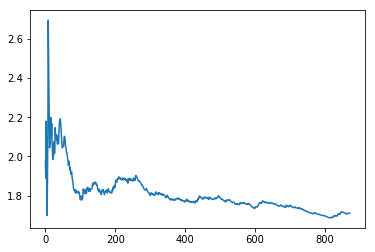

In [173]:
plt.plot(loss_average_list)
plt.show()

In [ ]:
def bpr_loss(preds, vals):
    sig = nn.Sigmoid()
    return (1.0 - sig(preds)).pow(2).sum()